In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 01. Carbon Emissions.

In [2]:
df = pd.read_csv("CarbonEmissionIndia.csv")

In [3]:
df.head()

States  per capita CO2 (kg per person)  \
0  Andhra Pradesh                          974.17   
1       Arunachal                          405.90   
2           Assam                          340.91   
3           Bihar                          179.01   
4     Chattisgarh                         1963.88   

   per capita CO (kg per person)  per capita CH4 (kg per person)  
0                          27.18                           16.97  
1                          17.43                           25.82  
2                          16.63                           21.29  
3                           8.83                            9.59  
4                          17.56                           22.37

In [4]:
df.shape

(28, 4)

In [5]:
df.columns

Index(['States', 'per capita CO2 (kg per person)',
       'per capita CO (kg per person)', 'per capita CH4 (kg per person)'],
      dtype='object')

In [6]:
df.isnull().sum()

States                            0
per capita CO2 (kg per person)    0
per capita CO (kg per person)     0
per capita CH4 (kg per person)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe(percentiles = [0.005, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 0.995])

per capita CO2 (kg per person)  per capita CO (kg per person)  \
count                       28.000000                      28.000000   
mean                       894.401071                      18.293214   
std                        547.619397                       5.258928   
min                        179.010000                       8.830000   
0.5%                       194.755050                       9.095950   
1%                         210.500100                       9.361900   
5%                         311.484500                      11.108000   
10%                        367.713000                      12.184000   
25%                        505.025000                      14.847500   
50%                        771.625000                      17.495000   
75%                       1058.092500                      23.235000   
90%                       1467.825000                      25.431000   
95%                       1842.850000                      26.977000   
99%                       2473.879900                      27.705600   
99.5%                     2568.194950                      27.802800   
max                       2662.510000                      27.900000   

       per capita CH4 (kg per person)  
count                       28.000000  
mean                        16.549286  
std                          6.599384  
min                          4.520000  
0.5%                         4.938500  
1%                           5.357000  
5%                           8.309500  
10%                          9.737000  
25%                         11.830000  
50%                         15.690000  
75%                         20.232500  
90%                         23.587000  
95%                         27.939000  
99%                         32.219000  
99.5%                       32.799500  
max                         33.380000

In [9]:
df.dtypes

States                             object
per capita CO2 (kg per person)    float64
per capita CO (kg per person)     float64
per capita CH4 (kg per person)    float64
dtype: object

In [10]:
df.isin([0]).any()

States                            False
per capita CO2 (kg per person)    False
per capita CO (kg per person)     False
per capita CH4 (kg per person)    False
dtype: bool

array([[<AxesSubplot:title={'center':'per capita CO2 (kg per person)'}>,
        <AxesSubplot:title={'center':'per capita CO (kg per person)'}>],
       [<AxesSubplot:title={'center':'per capita CH4 (kg per person)'}>,
        <AxesSubplot:>]], dtype=object)

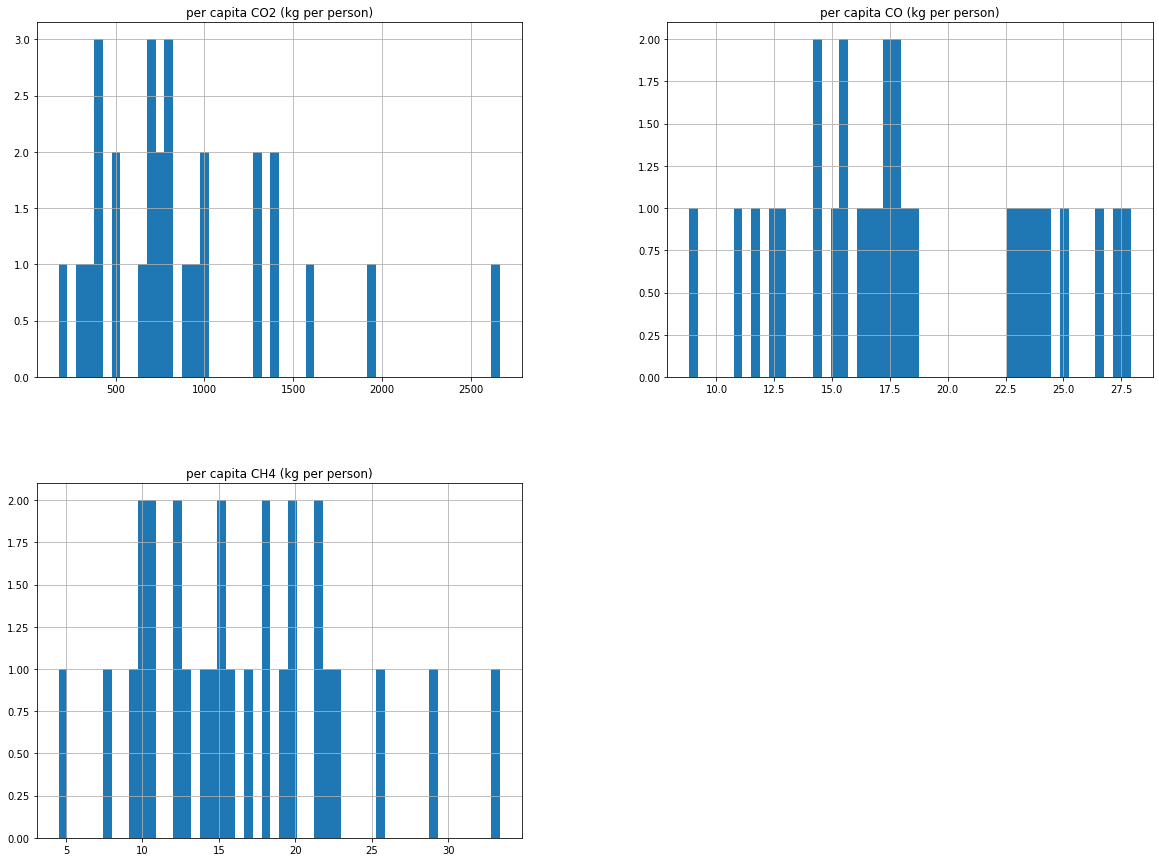

In [11]:
df.hist(bins = 50, figsize = (20, 15))

<AxesSubplot:>

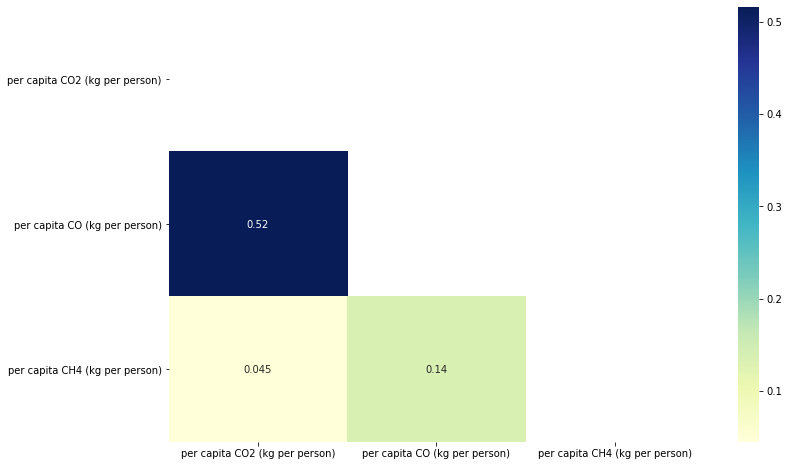

In [12]:
corr_mat = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, mask = np.triu(corr_mat), cmap="YlGnBu", annot = True)

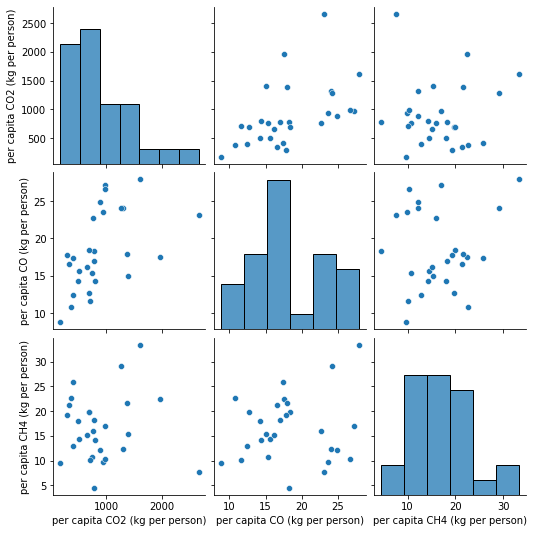

In [13]:
sns.pairplot(df)

In [14]:
df.columns

Index(['States', 'per capita CO2 (kg per person)',
       'per capita CO (kg per person)', 'per capita CH4 (kg per person)'],
      dtype='object')

### Preprocess and Fit

In [15]:
from sklearn.model_selection import train_test_split

#### Combination of input features

In [16]:
from itertools import combinations
  
comb = combinations(df.drop("States", axis = 1).columns, 2)

combinations = list(comb)
  
for i in combinations:
    print(i)

('per capita CO2 (kg per person)', 'per capita CO (kg per person)')
('per capita CO2 (kg per person)', 'per capita CH4 (kg per person)')
('per capita CO (kg per person)', 'per capita CH4 (kg per person)')


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [18]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

k_range = np.arange(1, 7, 1)

#### A. 2 Features.

### With KMedoids

In [19]:
def cluster_plots(a, b):
    features = [a, b]
    
    print("Selected Features: {} * {}".format(a, b))    
    num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ])
    
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, features),
    ])
    
    df_scaled = full_pipeline.fit_transform(df)
    
    inertia = []
    inertia_medoid = []
    silhouette = []
    silhouette_medoid = []
    for k in k_range:
        cls = KMeans(n_clusters = k, random_state = 42)
        cls.fit(df_scaled)
        centroids = cls.cluster_centers_
        u_labels = np.unique(cls.labels_)
        labels = cls.labels_
        
        cls_medoid = KMedoids(n_clusters = k, random_state = 42)
        cls_medoid.fit(df_scaled)
        centroids_medoid = cls_medoid.cluster_centers_
        u_labels_medoid = np.unique(cls_medoid.labels_)
        labels_medoid = cls_medoid.labels_
        
        fig, axes = plt.subplots(1, 2 , figsize=(20, 7))
    
        axes[0].scatter(df_scaled[:, 0], df_scaled[:, 1], c = labels.astype(float), edgecolor='face', s = 60)
        axes[0].scatter(cls.cluster_centers_[:, 0], cls.cluster_centers_[:, 1], c = 'white', edgecolor = 'black', linewidth = 2)
        axes[0].set_title("KMeans Clustering: K = {}".format(k), fontsize = 18)
        axes[0].set_xlabel("{}".format(a), fontsize = 18)
        axes[0].set_ylabel("{}".format(b), fontsize = 18)
        axes[0].tick_params(axis='both', labelsize=20)

        axes[1].scatter(df_scaled[:, 0], df_scaled[:, 1], c = labels_medoid.astype(float), edgecolor='face', s = 60)
        axes[1].scatter(cls_medoid.cluster_centers_[:, 0], cls_medoid.cluster_centers_[:, 1], c = 'white', edgecolor = 'black', linewidth = 2)
        axes[1].set_title("KMedoids Clustering: K = {}".format(k), fontsize = 18)
        axes[1].set_xlabel("{}".format(a), fontsize = 18)
        axes[1].set_ylabel("{}".format(b), fontsize = 18)
        axes[1].tick_params(axis='both', labelsize=20)
        
        
        inertia.append(cls.inertia_)
        inertia_medoid.append(cls_medoid.inertia_)
        if k >= 2:
            silhouette.append(silhouette_score(df_scaled, labels, metric='euclidean'))
            silhouette_medoid.append(silhouette_score(df_scaled, labels_medoid, metric='euclidean'))
        else:
            silhouette.append(0)
            silhouette_medoid.append(0)
            

    fig, axes = plt.subplots(1, 2 , figsize=(20, 7))
    x = k_range
    y = inertia
    z = silhouette

    axes[0].plot(x, y, label = "Inertia", color='blue', marker = 'o')
    axes[0].set_title('KMeans Inertia Variation', size = 18)
    axes[0].set_xlabel('Number of Clusters', fontsize = 18)
    axes[0].set_ylabel('Value', fontsize = 18)
    axes[0].legend(fontsize = 20)
    axes[0].tick_params(axis='both', labelsize=20)

    axes[1].plot(x, z, label = "Silhouette", color='blue', marker = 'o')
    axes[1].set_title('KMeans Silhouette Variation', size = 18)
    axes[1].set_xlabel('Number of Clusters', fontsize = 18)
    axes[1].set_ylabel('Value', fontsize = 18)
    axes[1].legend(fontsize = 20)
    axes[1].tick_params(axis='both', labelsize=20)
    
    fig, axes = plt.subplots(1, 2 , figsize=(20, 7))
    x = k_range
    y = inertia_medoid
    z = silhouette_medoid

    axes[0].plot(x, y, label = "Inertia", color='blue', marker = 'o')
    axes[0].set_title('KMedoids Inertia Variation', size = 18)
    axes[0].set_xlabel('Number of Clusters', fontsize = 18)
    axes[0].set_ylabel('Value', fontsize = 18)
    axes[0].legend(fontsize = 20)
    axes[0].tick_params(axis='both', labelsize=20)

    axes[1].plot(x, z, label = "Silhouette", color='blue', marker = 'o')
    axes[1].set_title('KMedoids Silhouette Variation', size = 18)
    axes[1].set_xlabel('Number of Clusters', fontsize = 18)
    axes[1].set_ylabel('Value', fontsize = 18)
    axes[1].legend(fontsize = 20)
    axes[1].tick_params(axis='both', labelsize=20)

#### a. CO2 * CO

Selected Features: per capita CO2 (kg per person) * per capita CO (kg per person)


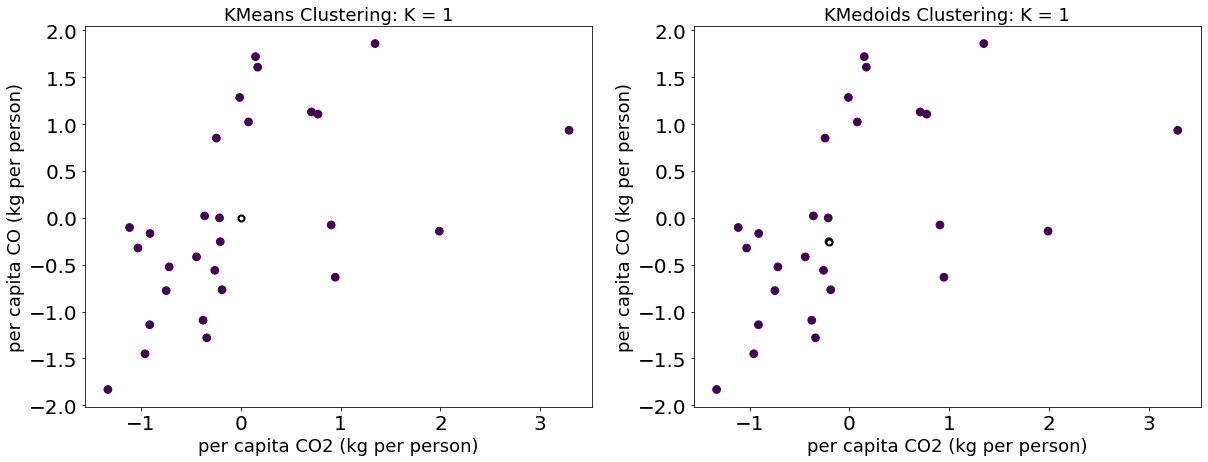

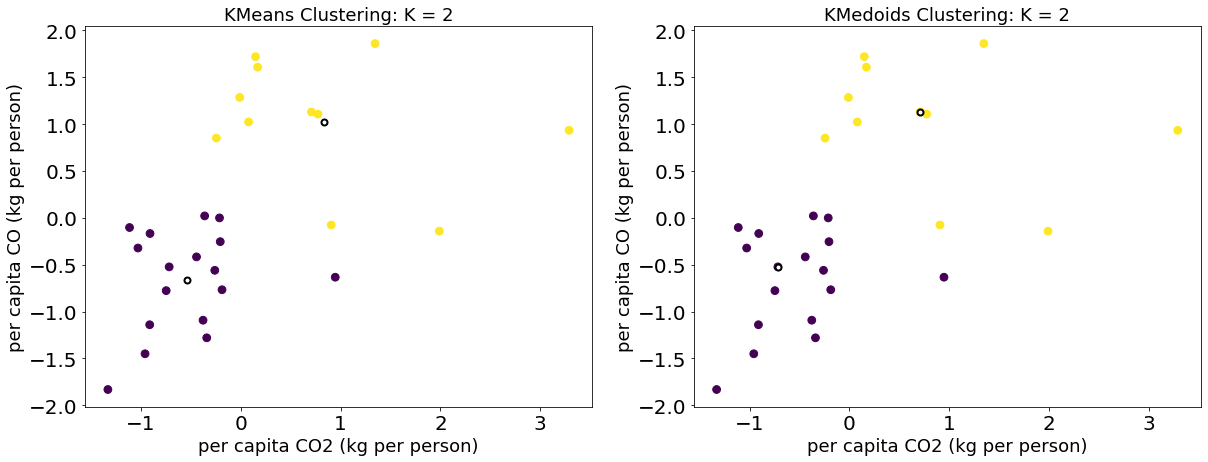

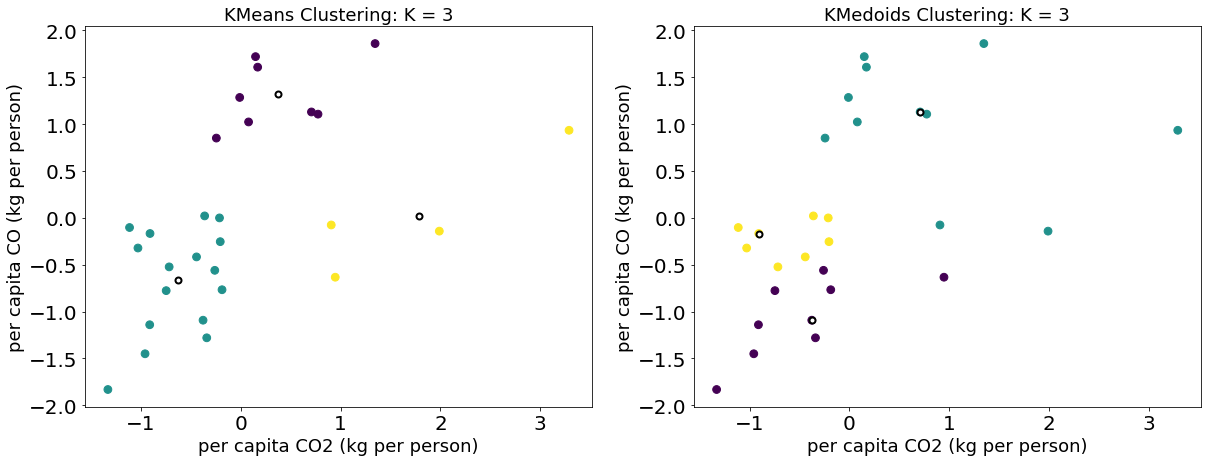

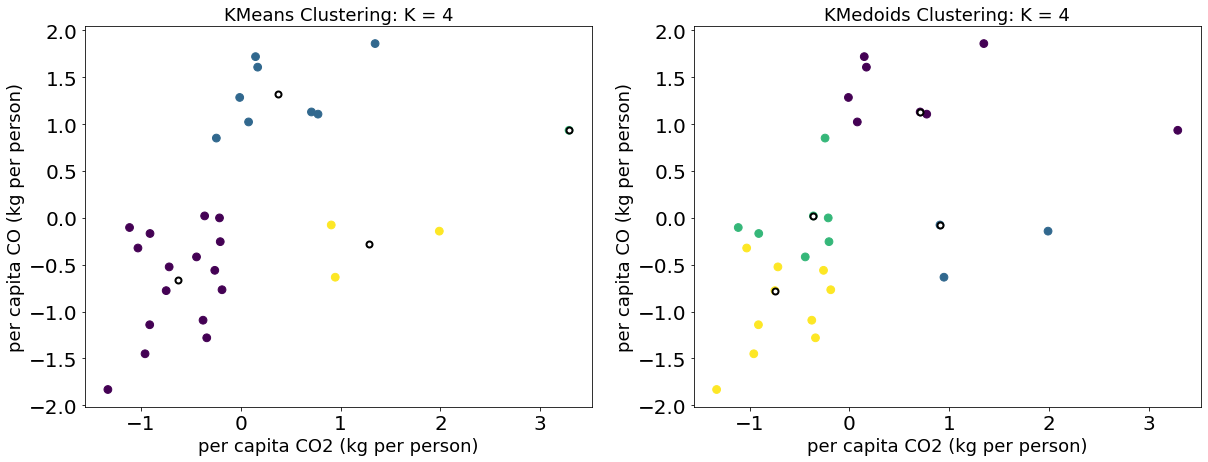

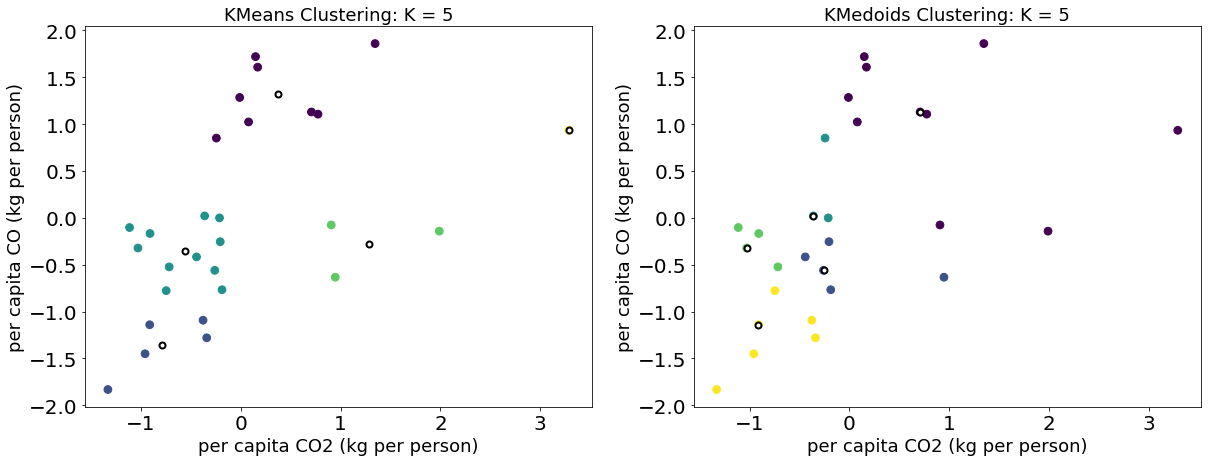

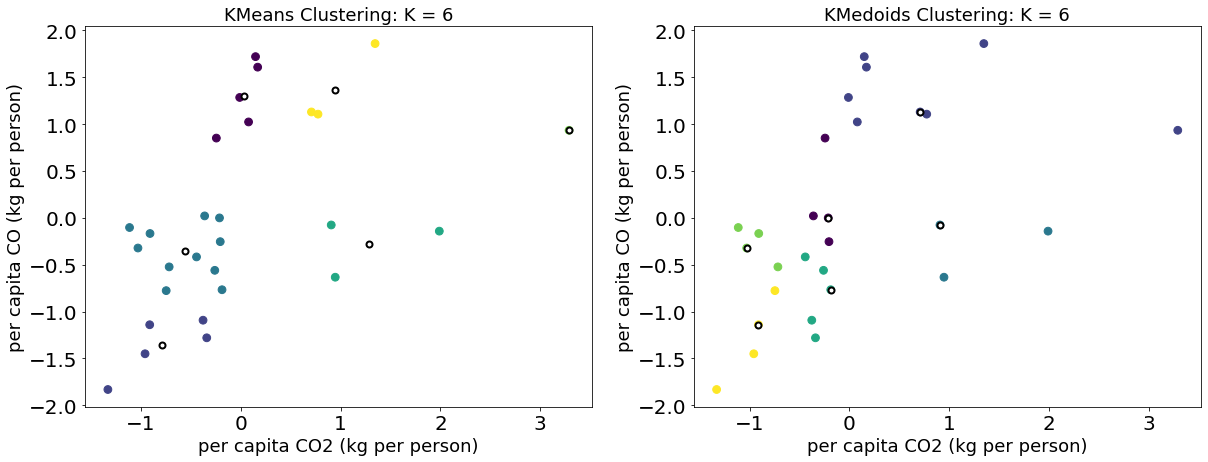

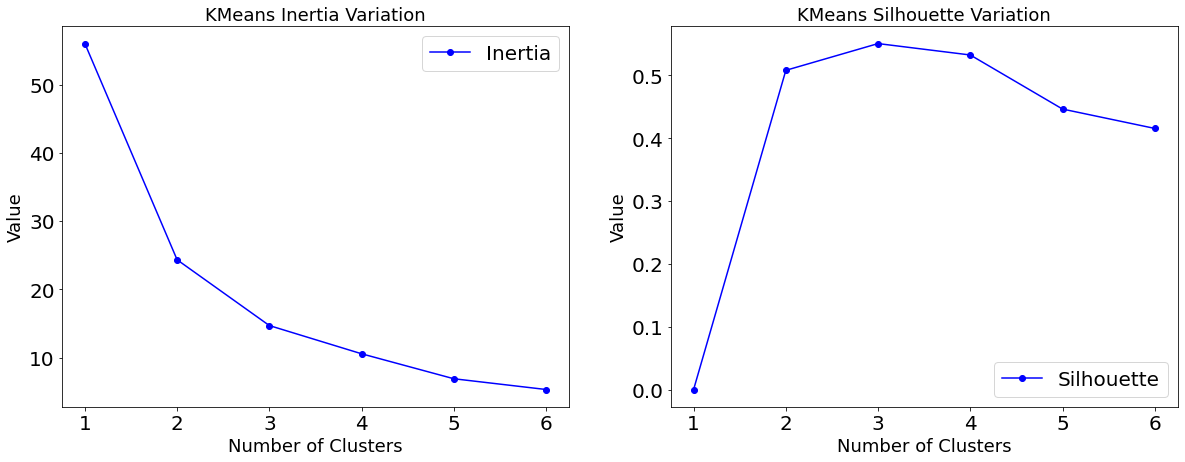

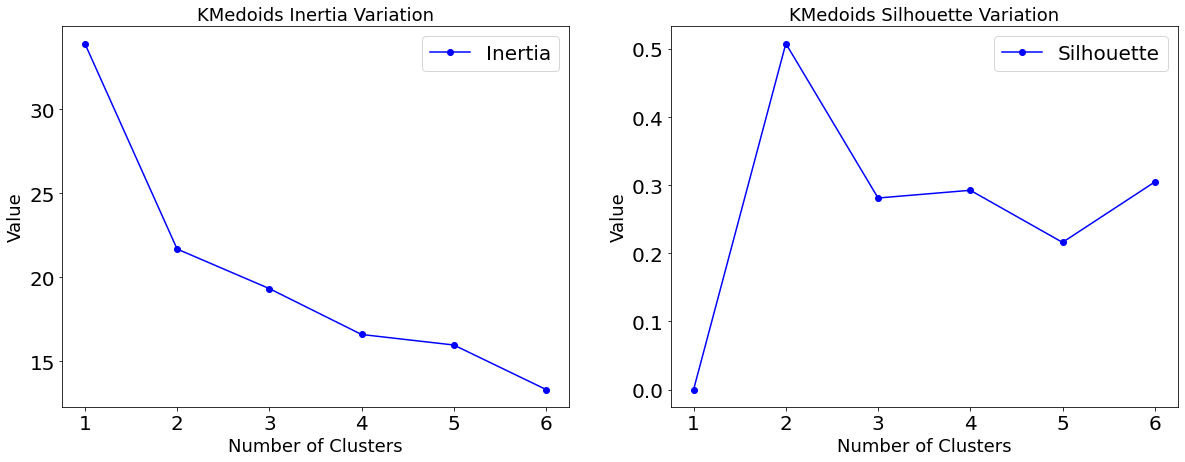

In [20]:
cluster_plots('per capita CO2 (kg per person)', 'per capita CO (kg per person)')

### Comments:

1. CO2 vs CO.
2. K = 3 is best parameter for KMeans and K = 2 for KMedoids using combination of Inertia and Silhouette coefficient.
3. We can see centroid is newly calculated for KMeans, whereas, it is an existing point for KMedoids.
4. Silhouette coefficient is above 0.5 indicating decent clustering.

#### b. CO2 * CH4

Selected Features: per capita CO2 (kg per person) * per capita CH4 (kg per person)


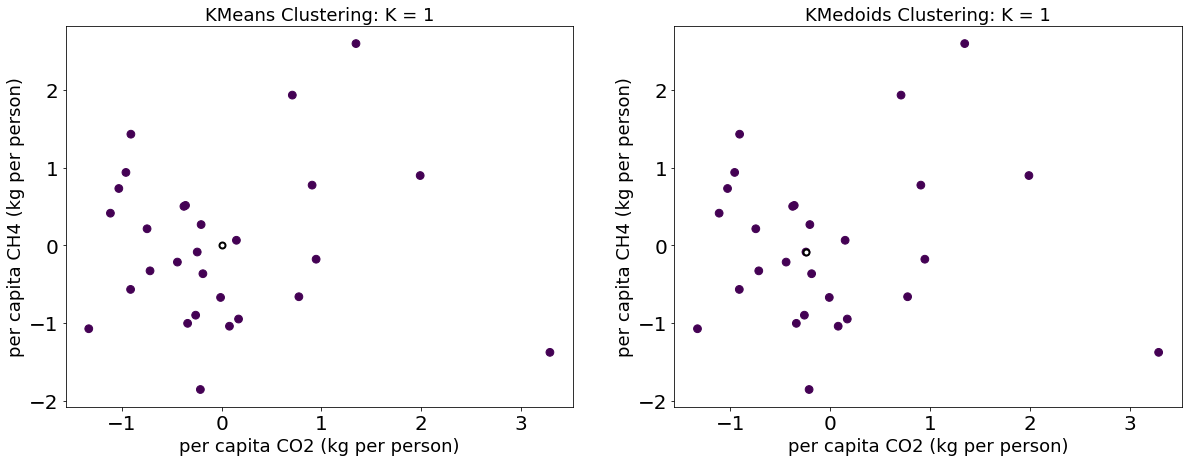

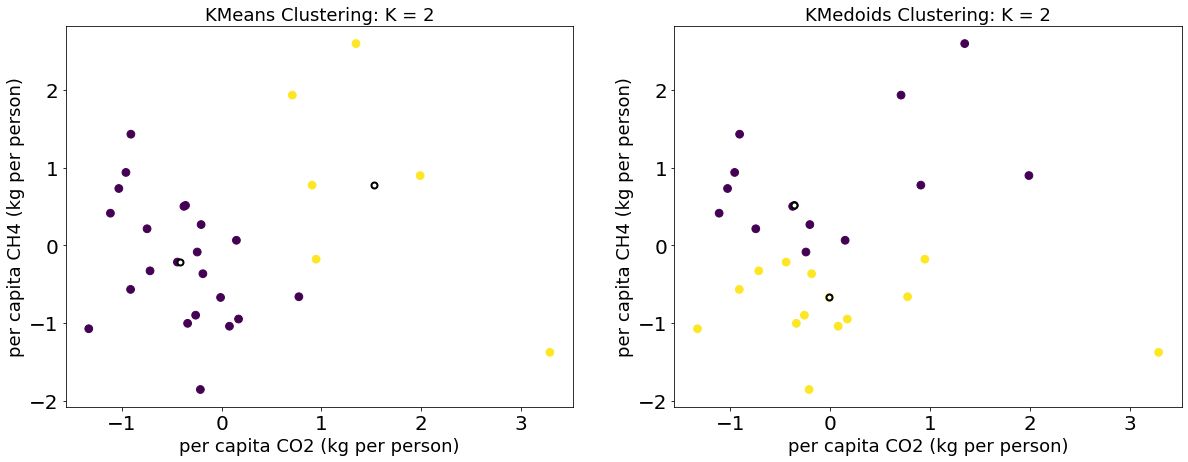

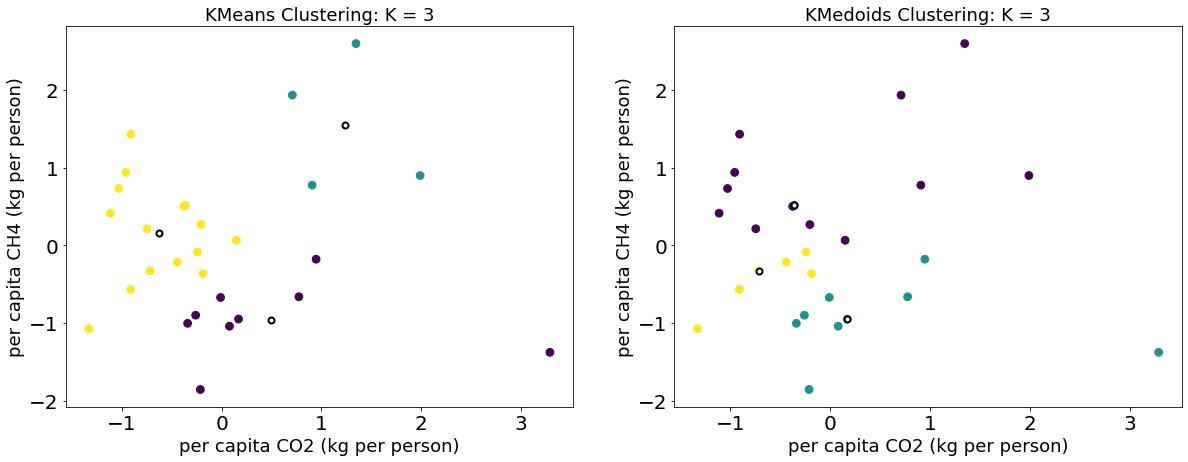

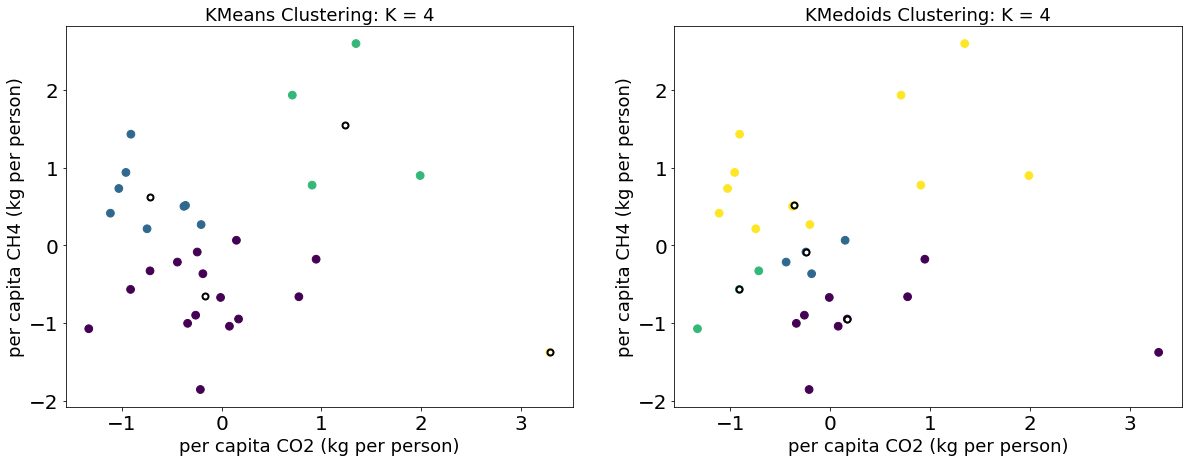

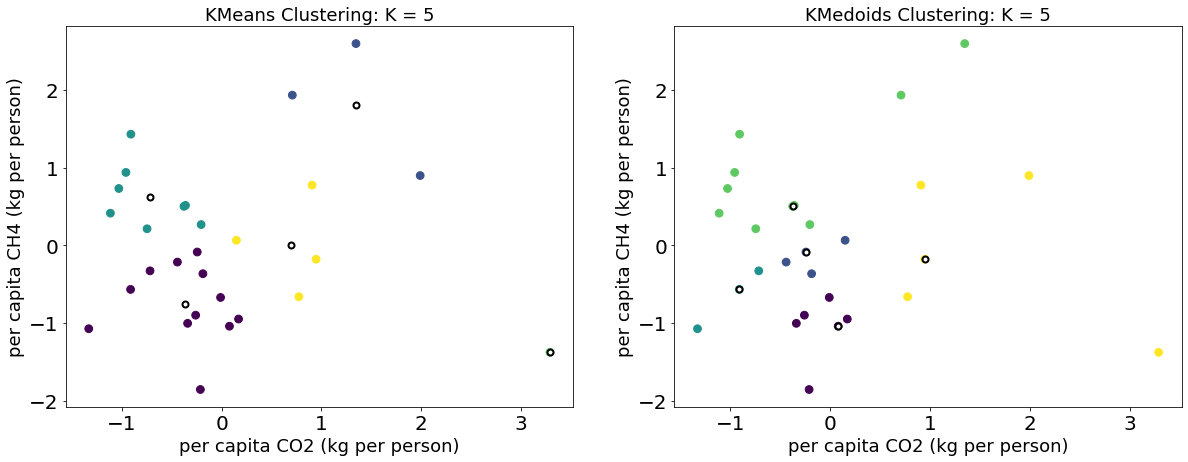

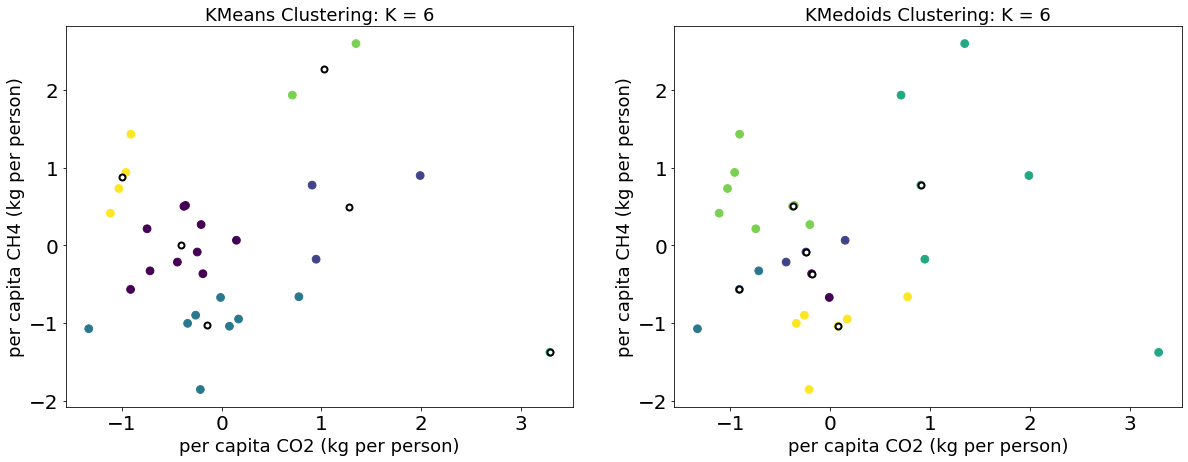

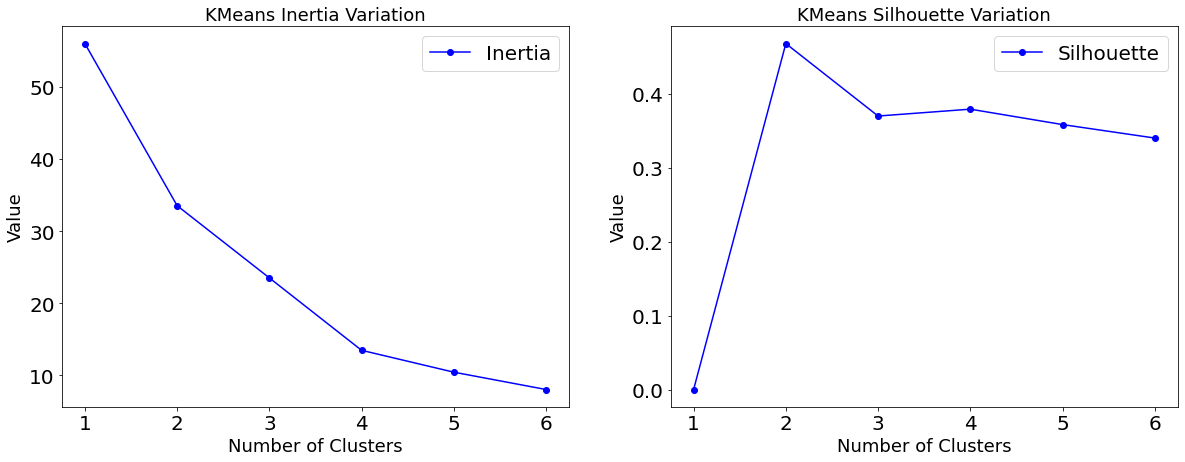

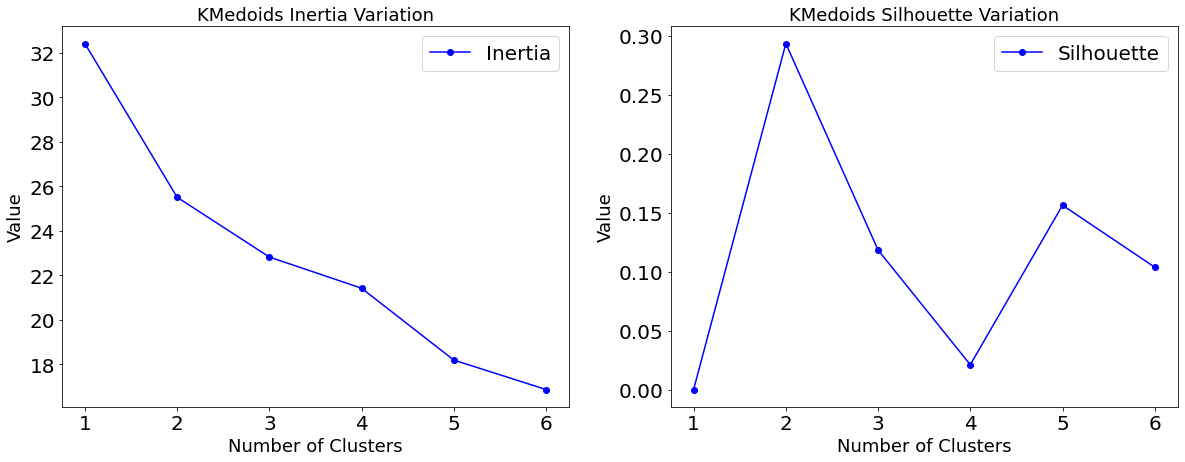

In [21]:
cluster_plots('per capita CO2 (kg per person)', 'per capita CH4 (kg per person)')

### Comments:

1. CO2 vs CH4.
2. K = 2 is best parameter for KMeans and K = 2 for KMedoids using combination of Inertia and Silhouette coefficient.
3. We can see centroid is newly calculated for KMeans, whereas, it is an existing point for KMedoids.
4. Silhouette coefficient is above 0.4 for KMeans and around 0.3 for KMedoids indicating better clustering with KMeans.

#### c. CH4 * CO

Selected Features: per capita CH4 (kg per person) * per capita CO (kg per person)


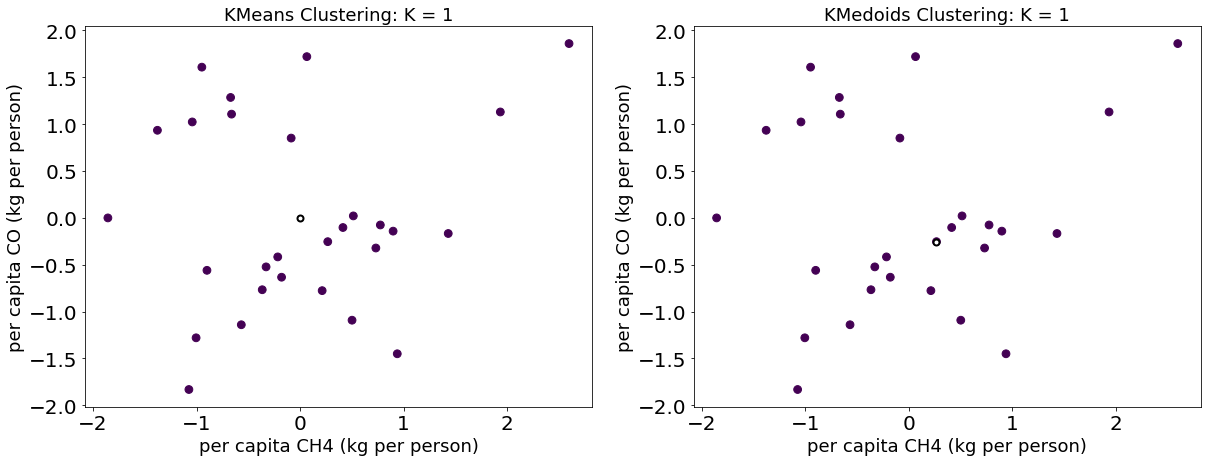

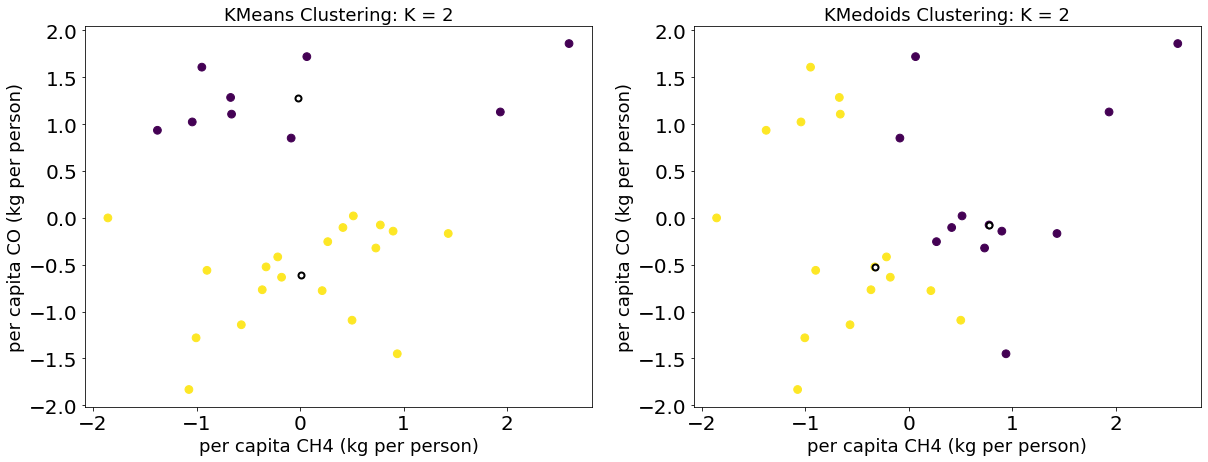

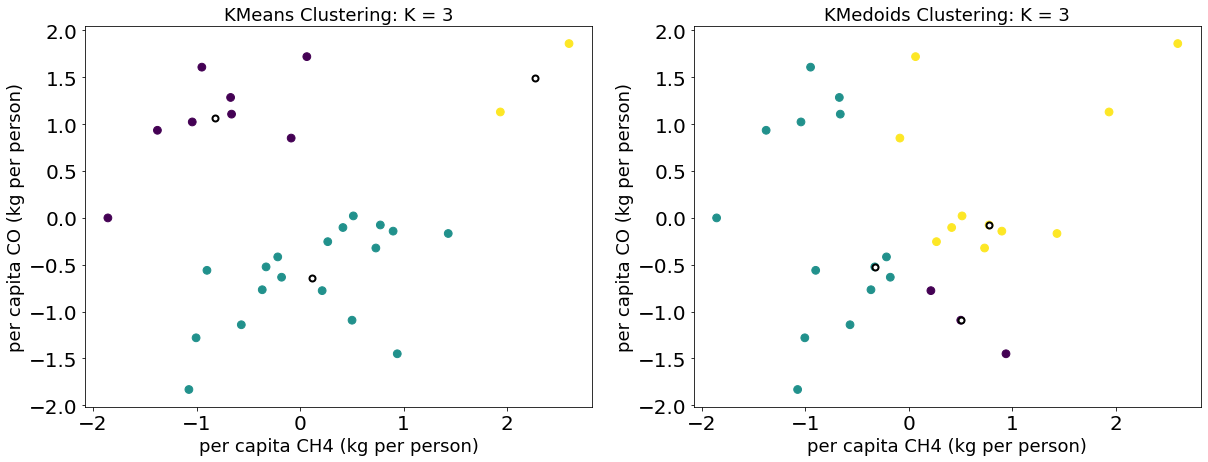

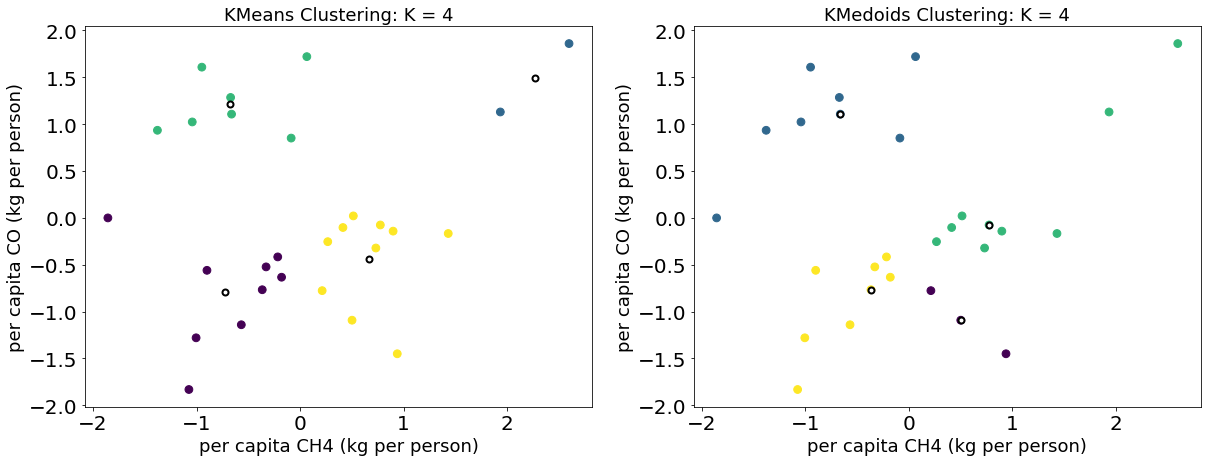

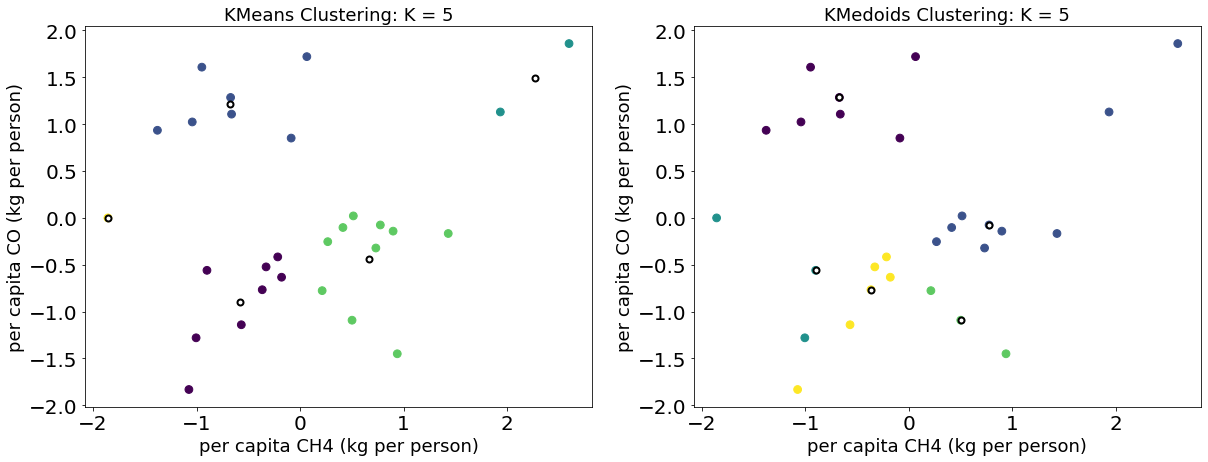

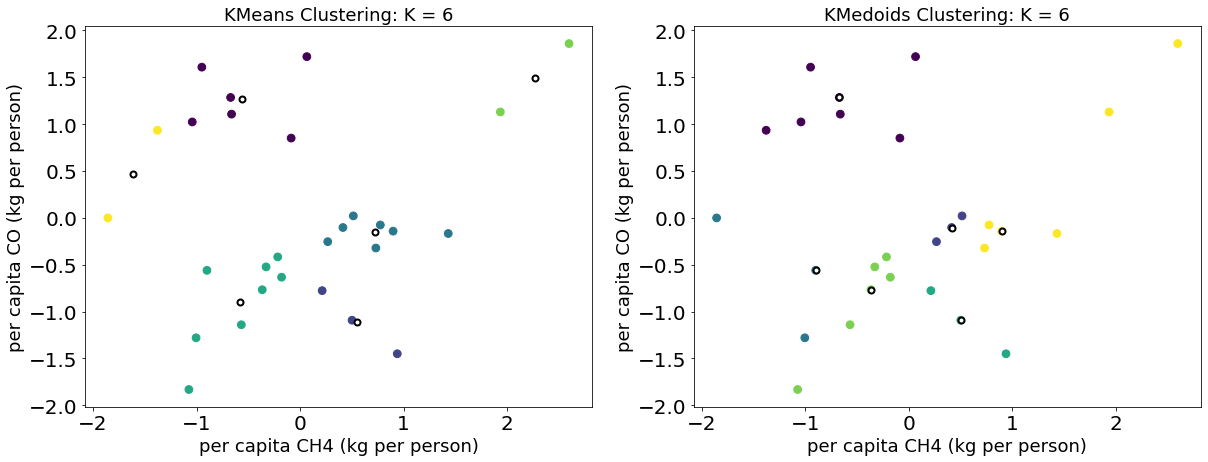

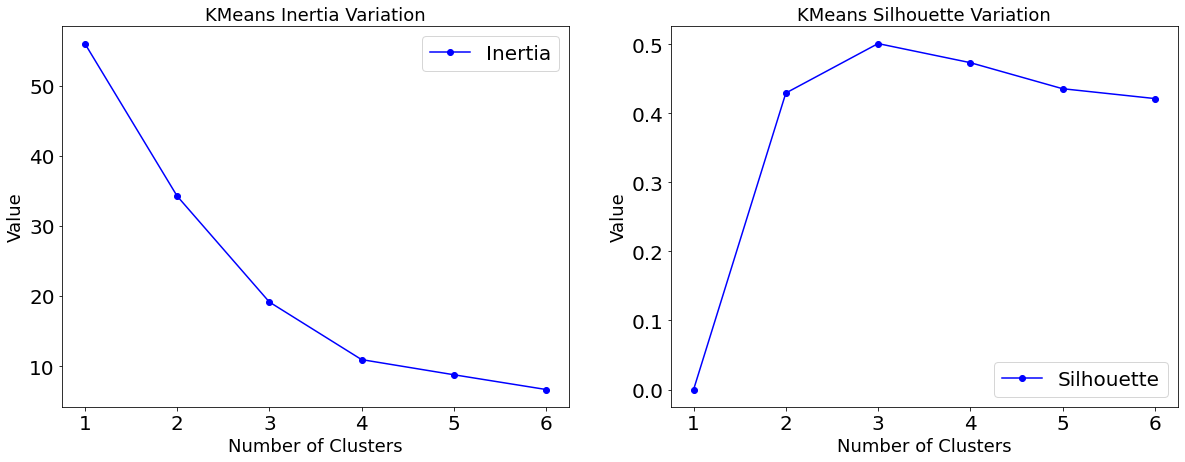

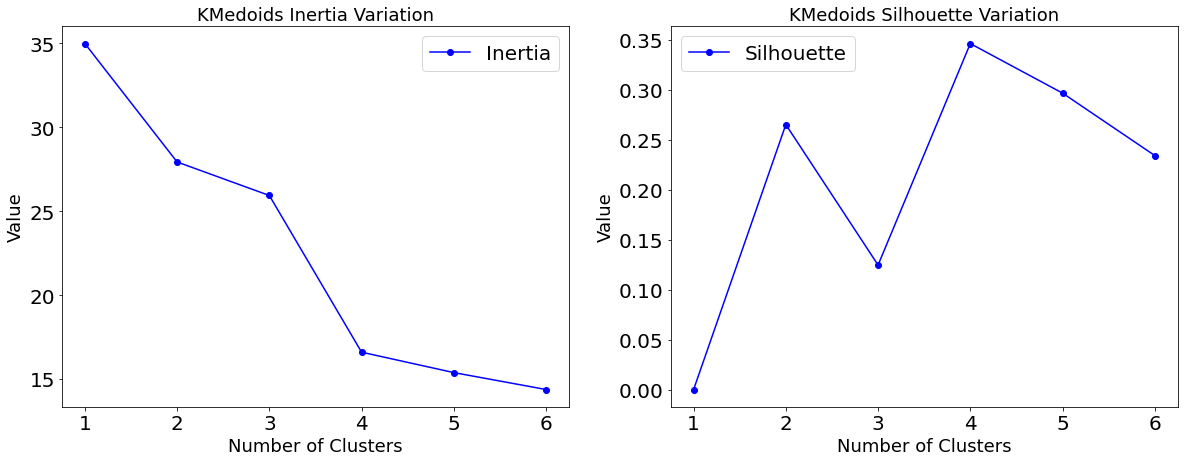

In [22]:
cluster_plots('per capita CH4 (kg per person)', 'per capita CO (kg per person)')

### Comments:

1. CH4 vs CO.
2. K = 3 is best parameter for KMeans and K = 4 for KMedoids using combination of Inertia and Silhouette coefficient.
3. We can see centroid is newly calculated for KMeans, whereas, it is an existing point for KMedoids.
4. Silhouette coefficient is above 0.5 for KMeans while around 0.35 for KMedoids indicating KMeans being a better option.

#### B. 3 Features.

In [23]:
df.columns

Index(['States', 'per capita CO2 (kg per person)',
       'per capita CO (kg per person)', 'per capita CH4 (kg per person)'],
      dtype='object')

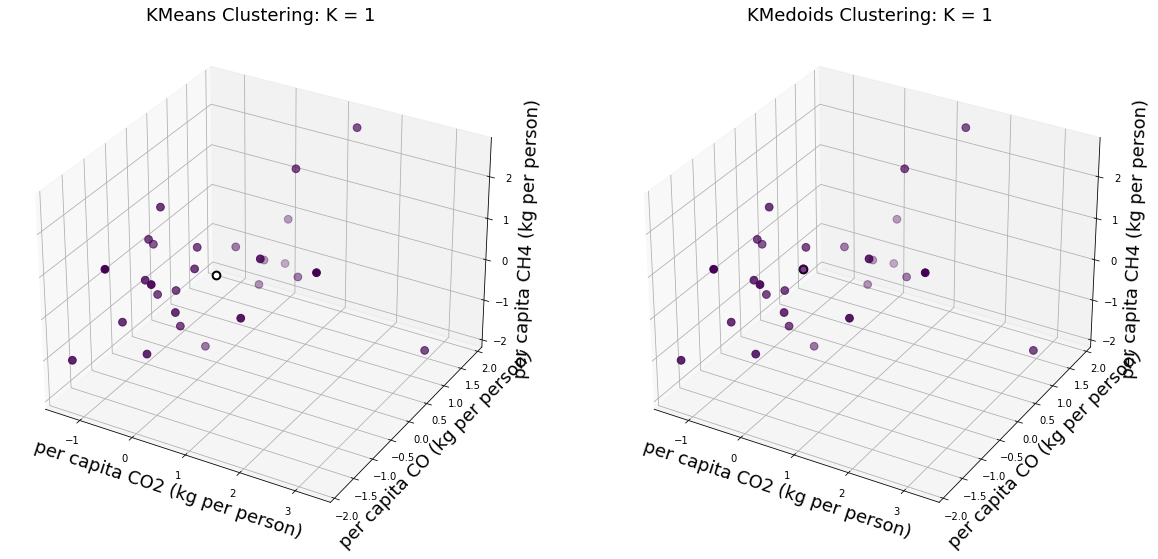

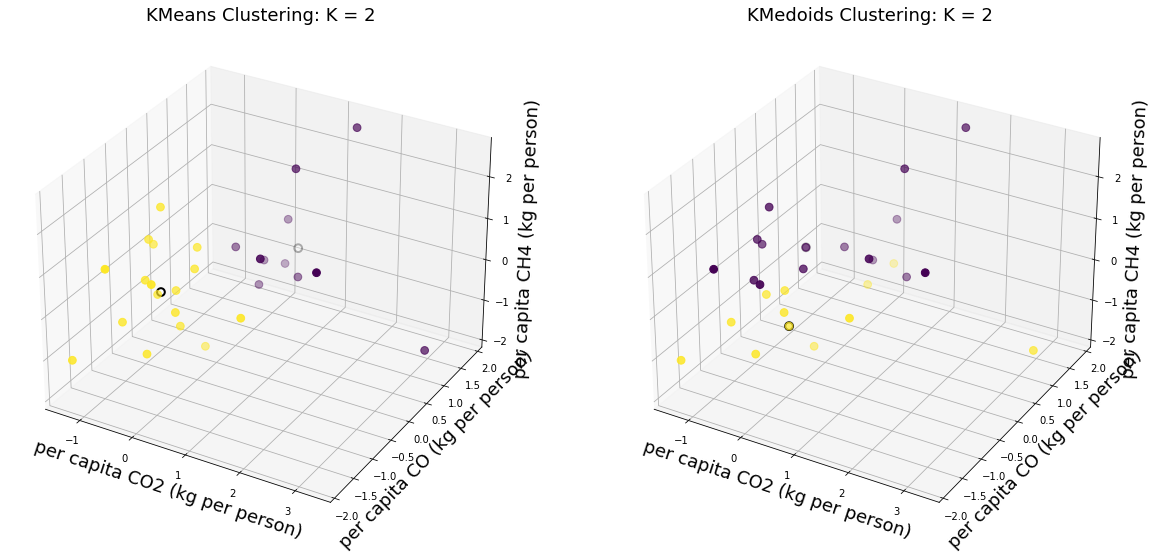

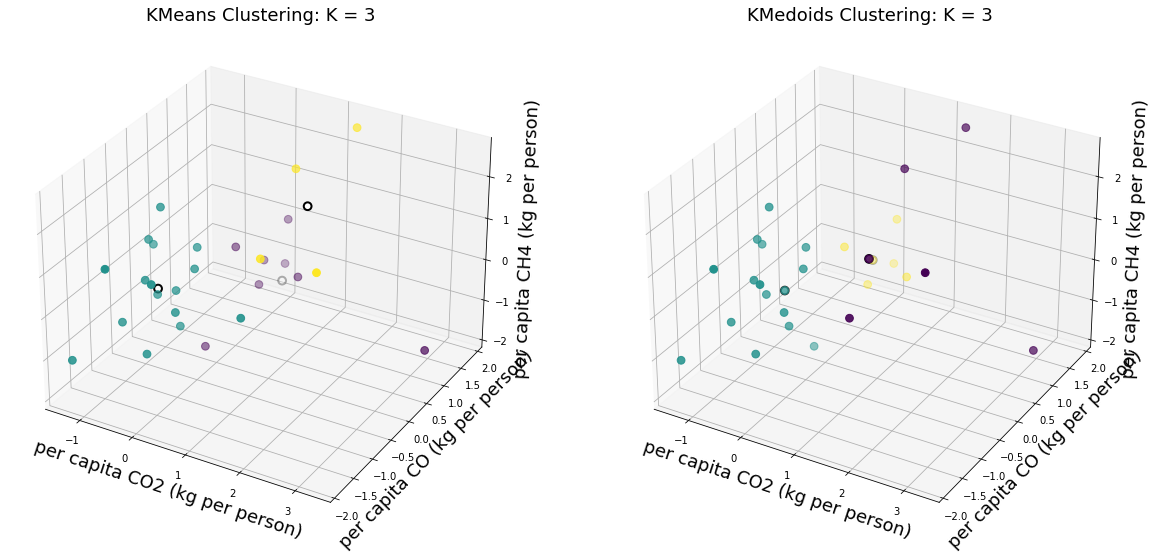

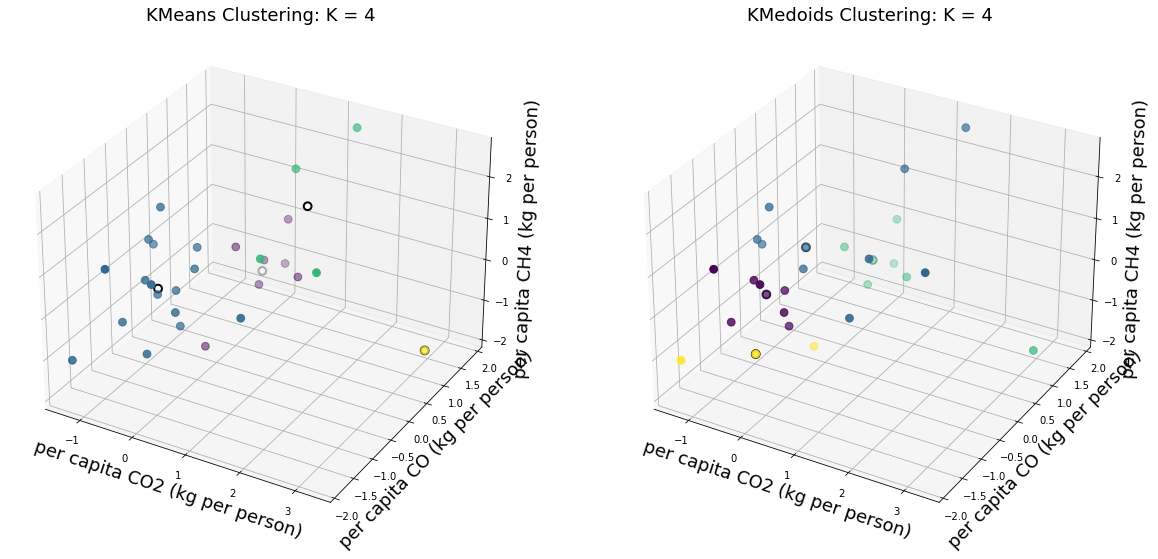

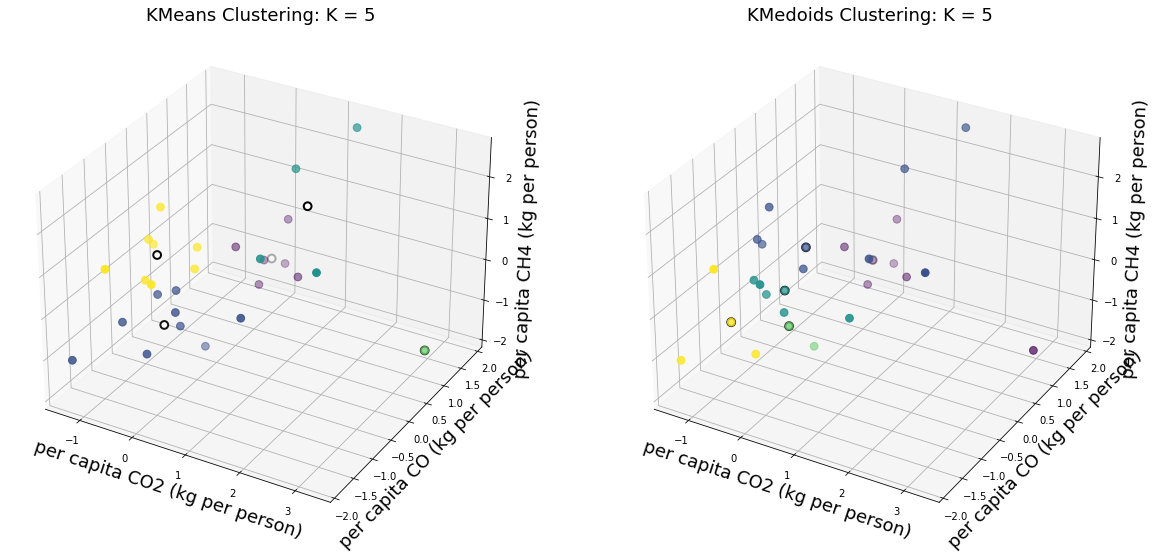

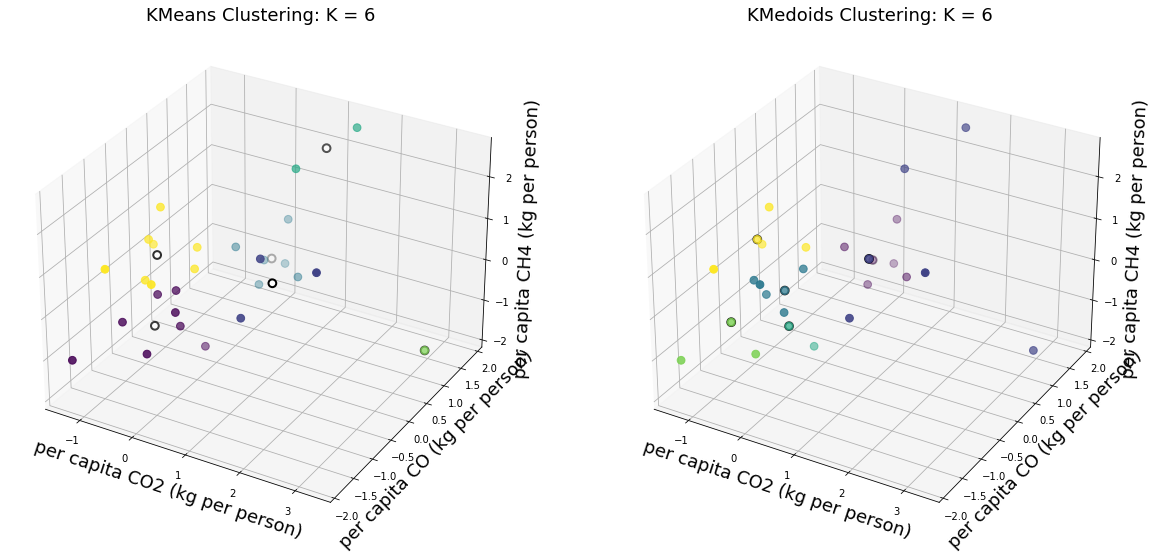

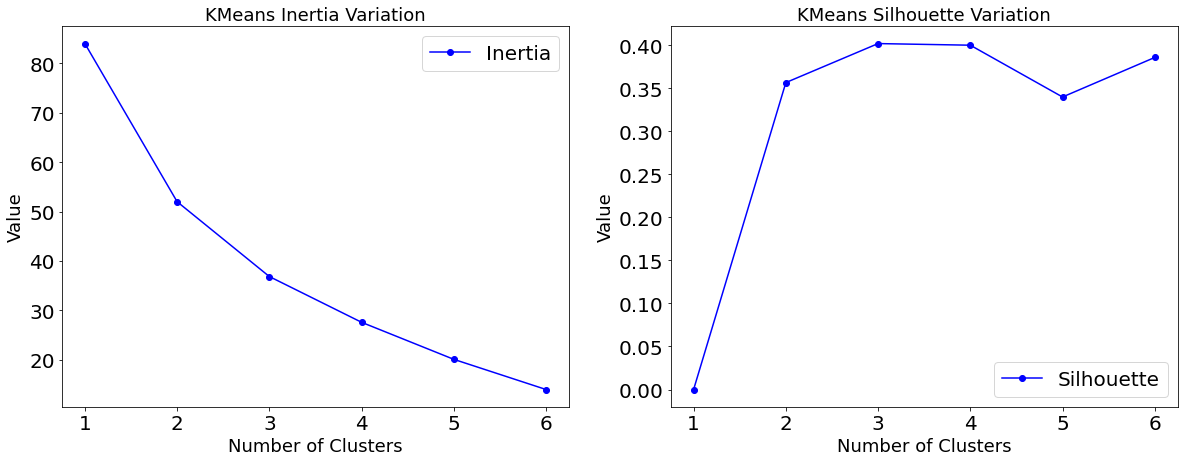

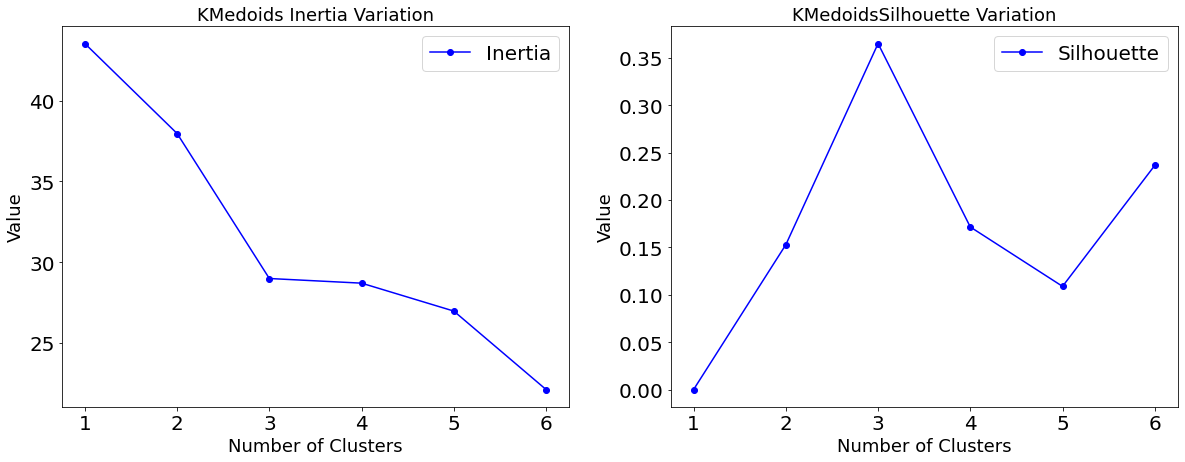

In [24]:
features = list(df.drop("States", axis = 1).columns)
    
num_pipeline = Pipeline([
('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, features),
])

df_scaled = full_pipeline.fit_transform(df)

inertia = []
inertia_medoid = []
silhouette = []
silhouette_medoid = []
for k in k_range:
    cls = KMeans(n_clusters = k, random_state = 42)
    cls.fit(df_scaled)
    centroids = cls.cluster_centers_
    u_labels = np.unique(cls.labels_)
    labels = cls.labels_
    
    cls_medoid = KMedoids(n_clusters = k, random_state = 42)
    cls_medoid.fit(df_scaled)
    centroids_medoid = cls_medoid.cluster_centers_
    u_labels_medoid = np.unique(cls_medoid.labels_)
    labels_medoid = cls_medoid.labels_
    
#     fig, axes = plt.subplots(1, 2 , figsize=(10, 10))
    
    fig = plt.figure(figsize = (20, 20))
    ax = fig.add_subplot(121, projection='3d')
    ay = fig.add_subplot(122, projection='3d')

    n = 100

    xs = df_scaled[:, 0]
    ys = df_scaled[:, 1]
    zs = df_scaled[:, 2]
    
    ax.scatter(xs, ys, zs, marker = 'o', s = 60, c = labels.astype(float), edgecolor='face')
    ax.scatter(cls.cluster_centers_[:, 0], cls.cluster_centers_[:, 1], cls.cluster_centers_[:, 2], marker = 'o', s = 60, c = "white", edgecolor='black', linewidth = 2)
    ax.set_title("KMeans Clustering: K = {}".format(k), fontsize = 18)
    ax.set_xlabel('per capita CO2 (kg per person)', fontsize = 18)
    ax.set_ylabel('per capita CO (kg per person)', fontsize = 18)
    ax.set_zlabel('per capita CH4 (kg per person)', fontsize = 18)
    
    ay.scatter(xs, ys, zs, marker = 'o', s = 60, c = labels_medoid.astype(float), edgecolor='face')
    ay.scatter(cls_medoid.cluster_centers_[:, 0], cls_medoid.cluster_centers_[:, 1], cls_medoid.cluster_centers_[:, 2], marker = 'o', s = 60, c = "white", edgecolor='black', linewidth = 2)
    ay.set_title("KMedoids Clustering: K = {}".format(k), fontsize = 18)
    ay.set_xlabel('per capita CO2 (kg per person)', fontsize = 18)
    ay.set_ylabel('per capita CO (kg per person)', fontsize = 18)
    ay.set_zlabel('per capita CH4 (kg per person)', fontsize = 18)

    plt.show()
    inertia.append(cls.inertia_)
    inertia_medoid.append(cls_medoid.inertia_)
    
    if k >= 2:
        silhouette.append(silhouette_score(df_scaled, labels, metric='euclidean'))
        silhouette_medoid.append(silhouette_score(df_scaled, labels_medoid, metric='euclidean'))
    else:
        silhouette.append(0)
        silhouette_medoid.append(0)

fig, axes = plt.subplots(1, 2 , figsize=(20, 7))
x = k_range
y = inertia
z = silhouette

axes[0].plot(x, y, label = "Inertia", color='blue', marker = 'o')
axes[0].set_title('KMeans Inertia Variation', size = 18)
axes[0].set_xlabel('Number of Clusters', fontsize = 18)
axes[0].set_ylabel('Value', fontsize = 18)
axes[0].legend(fontsize = 20)
axes[0].tick_params(axis='both', labelsize=20)

axes[1].plot(x, z, label = "Silhouette", color='blue', marker = 'o')
axes[1].set_title('KMeans Silhouette Variation', size = 18)
axes[1].set_xlabel('Number of Clusters', fontsize = 18)
axes[1].set_ylabel('Value', fontsize = 18)
axes[1].legend(fontsize = 20)
axes[1].tick_params(axis='both', labelsize=20)

fig, axes = plt.subplots(1, 2 , figsize=(20, 7))
x = k_range
y = inertia_medoid
z = silhouette_medoid

axes[0].plot(x, y, label = "Inertia", color='blue', marker = 'o')
axes[0].set_title('KMedoids Inertia Variation', size = 18)
axes[0].set_xlabel('Number of Clusters', fontsize = 18)
axes[0].set_ylabel('Value', fontsize = 18)
axes[0].legend(fontsize = 20)
axes[0].tick_params(axis='both', labelsize=20)

axes[1].plot(x, z, label = "Silhouette", color='blue', marker = 'o')
axes[1].set_title('KMedoids Silhouette Variation', size = 18)
axes[1].set_xlabel('Number of Clusters', fontsize = 18)
axes[1].set_ylabel('Value', fontsize = 18)
axes[1].legend(fontsize = 20)
axes[1].tick_params(axis='both', labelsize=20)

### Comments:

1. CH4 vs CO vs. CO2.
2. K = 3 is best parameter for KMeans and K = 3 for KMedoids using combination of Inertia and Silhouette coefficient.
3. We can see centroid is newly calculated for KMeans, whereas, it is an existing point for KMedoids.

## 02. Sample Cluster Data.

In [25]:
df1 = pd.read_csv("Sample_Cluster_Data.csv")

In [26]:
df1

X       Y
0     664159  550946
1     665845  557965
2     597173  575538
3     618600  551446
4     635690  608046
...      ...     ...
4995  665426  853940
4996  691827  863963
4997  650661  861267
4998  599647  858702
4999  684091  842566

[5000 rows x 2 columns]

In [27]:
k_range = np.arange(1, 21, 1)

<ipython-input-28-f46e6e635a6b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 2 , figsize=(20, 7))


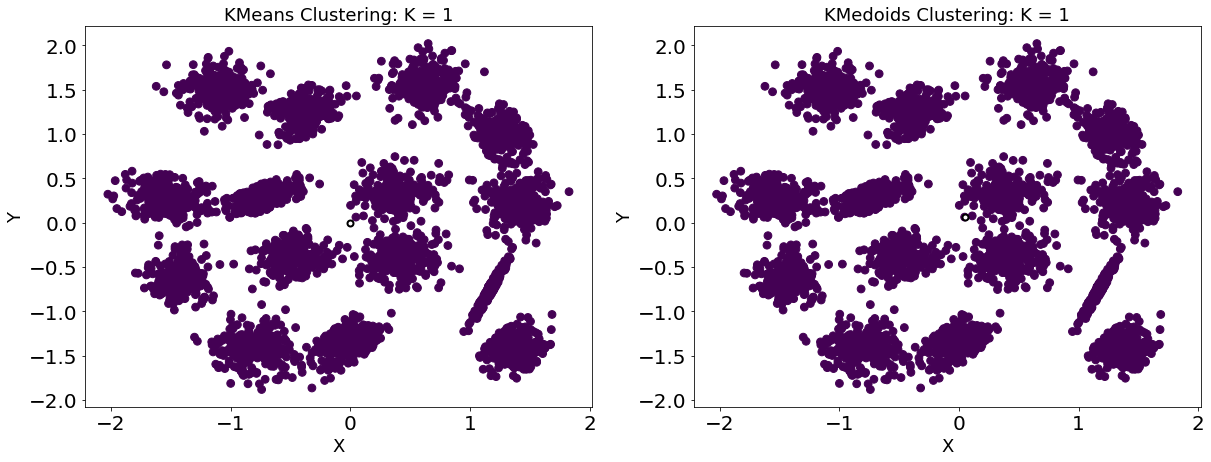

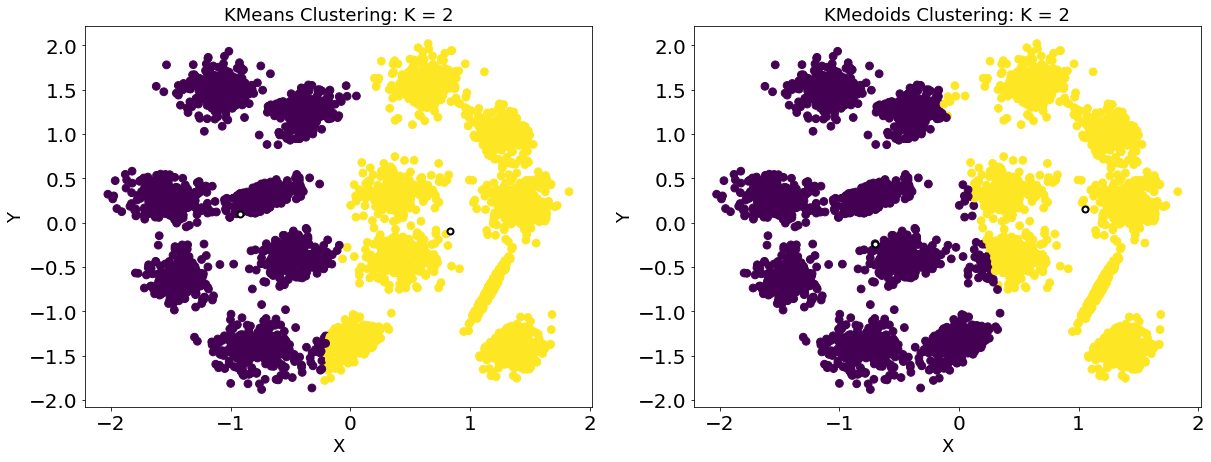

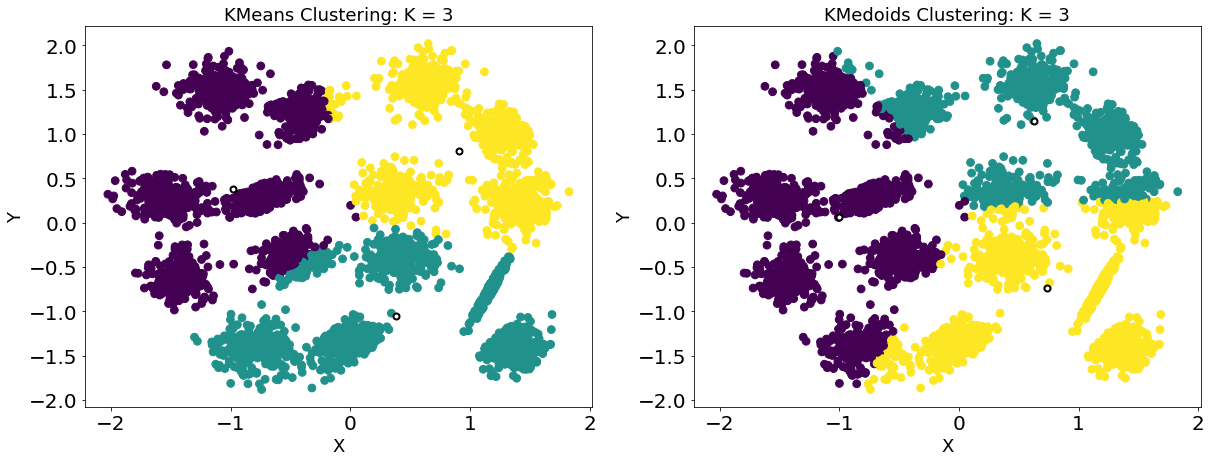

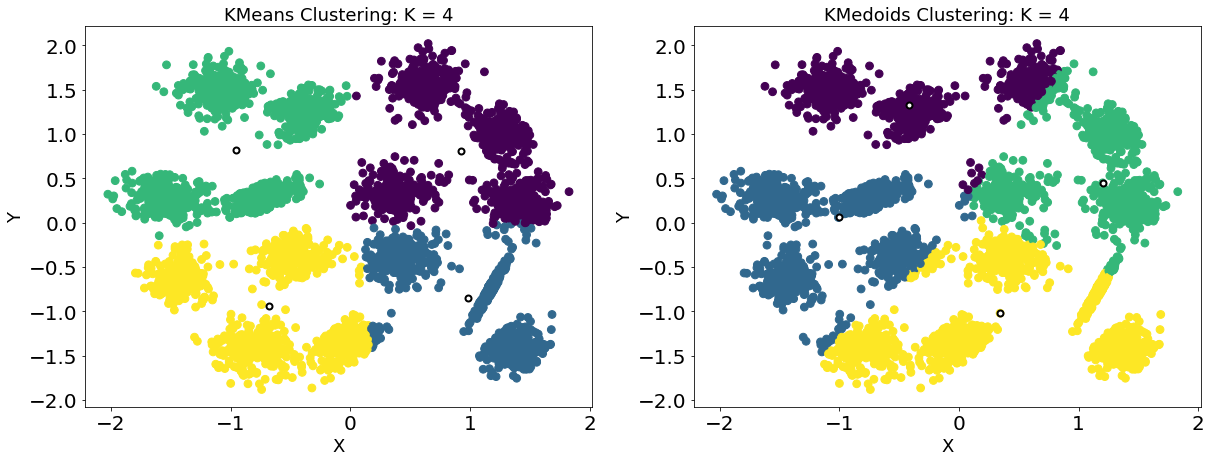

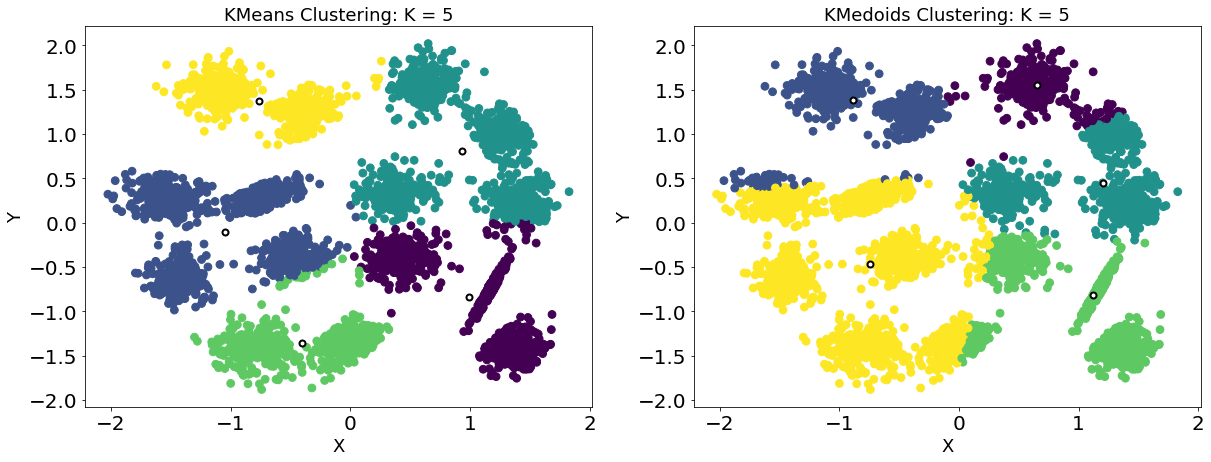

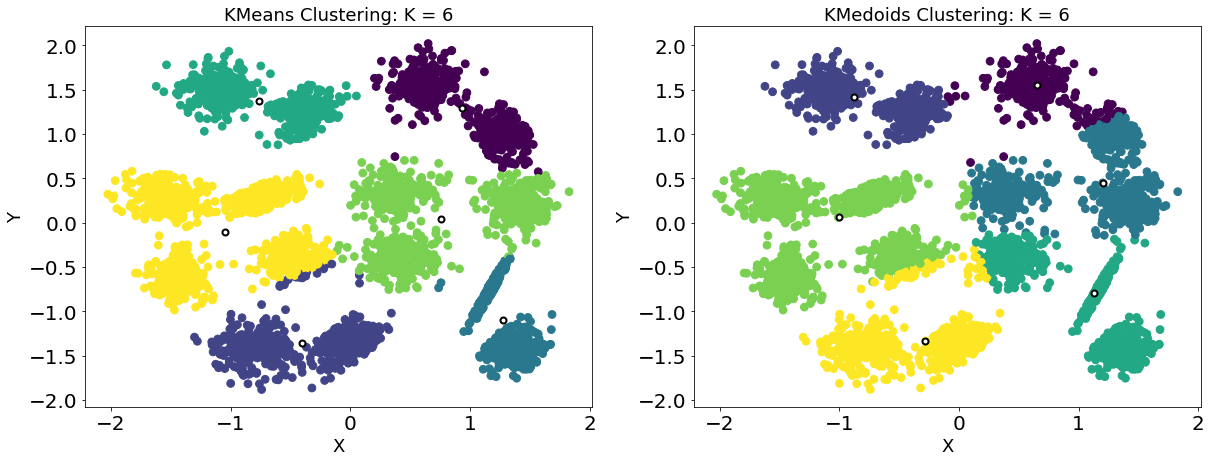

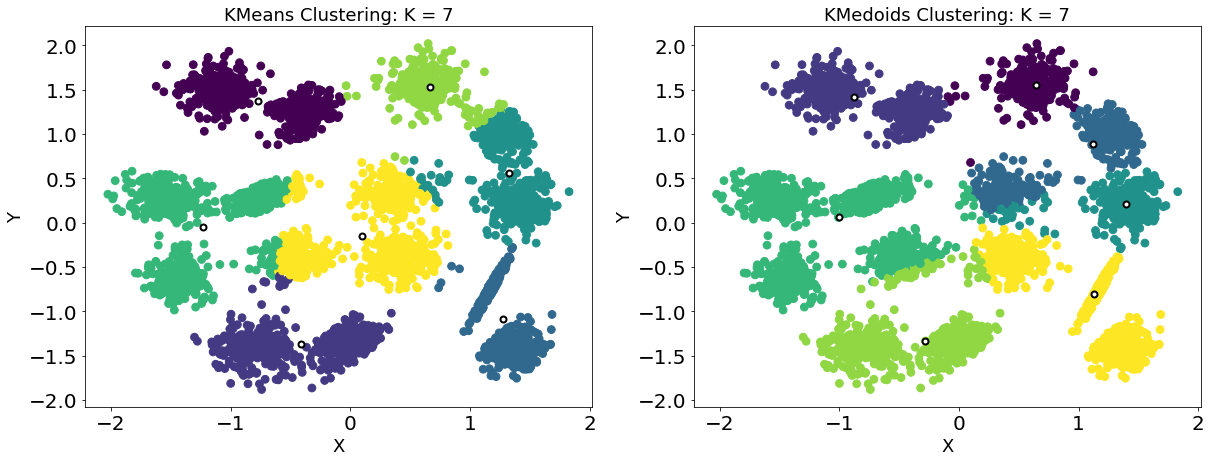

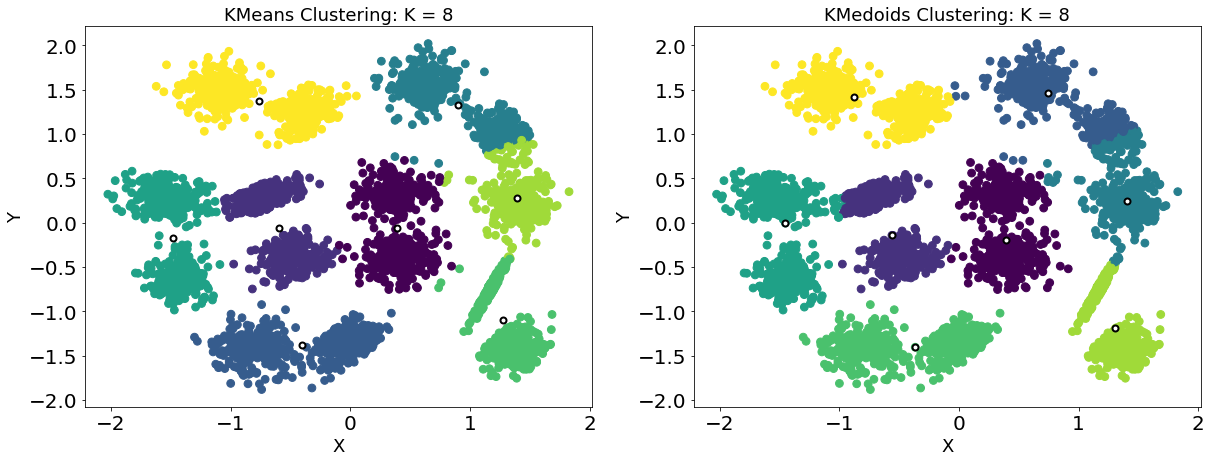

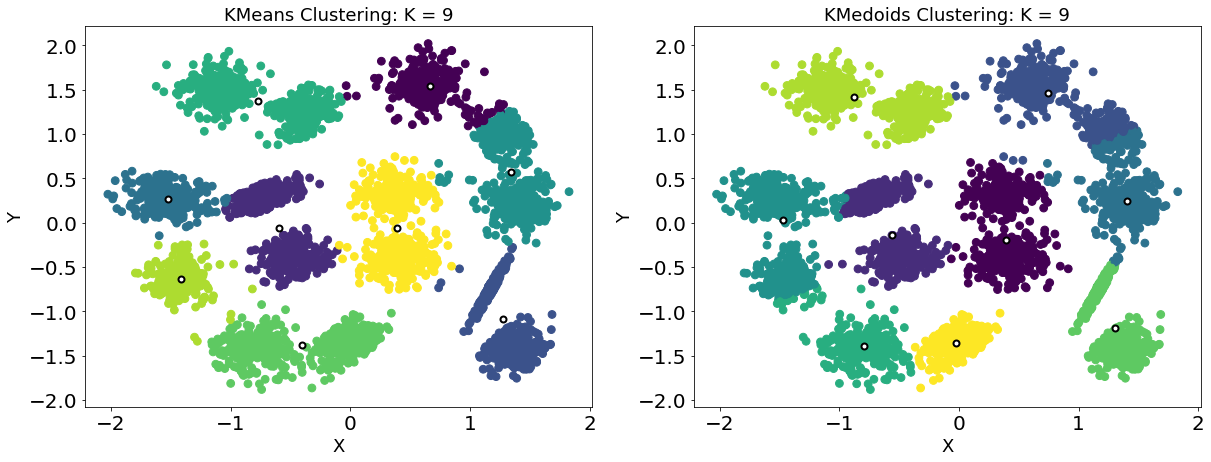

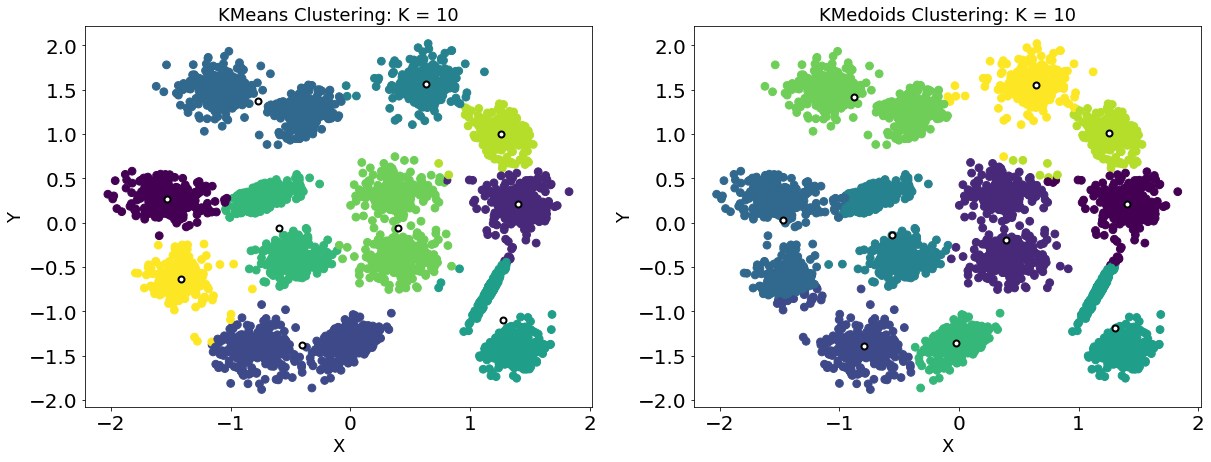

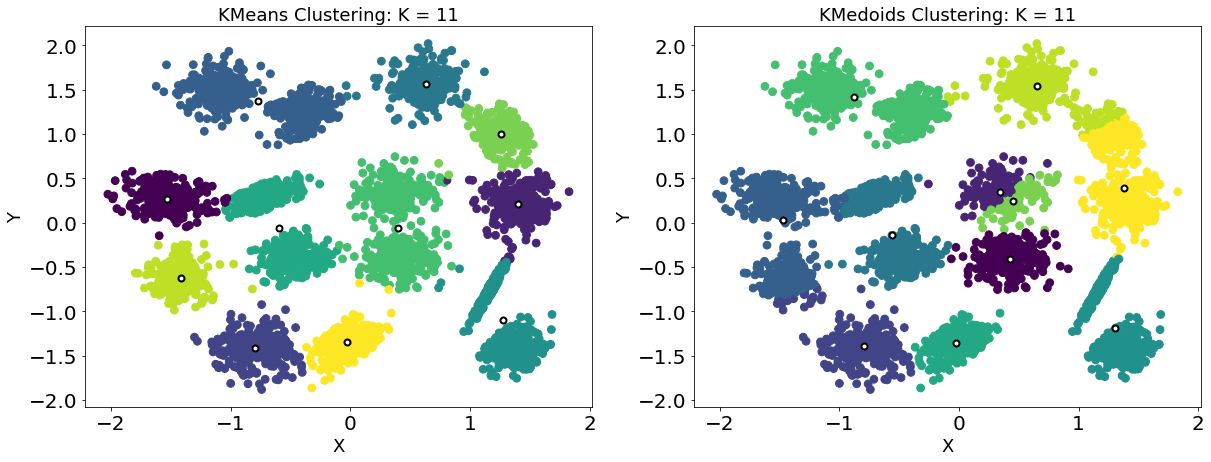

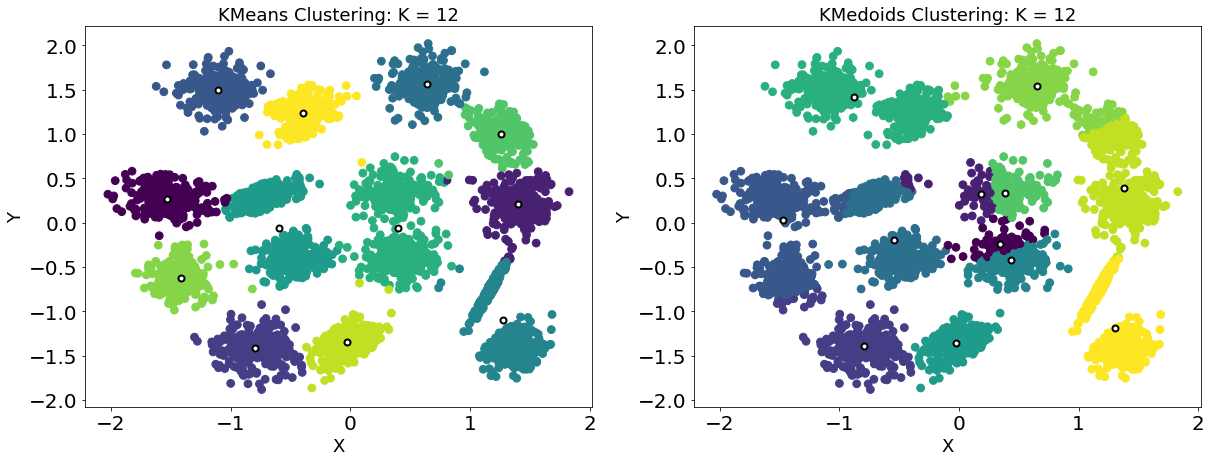

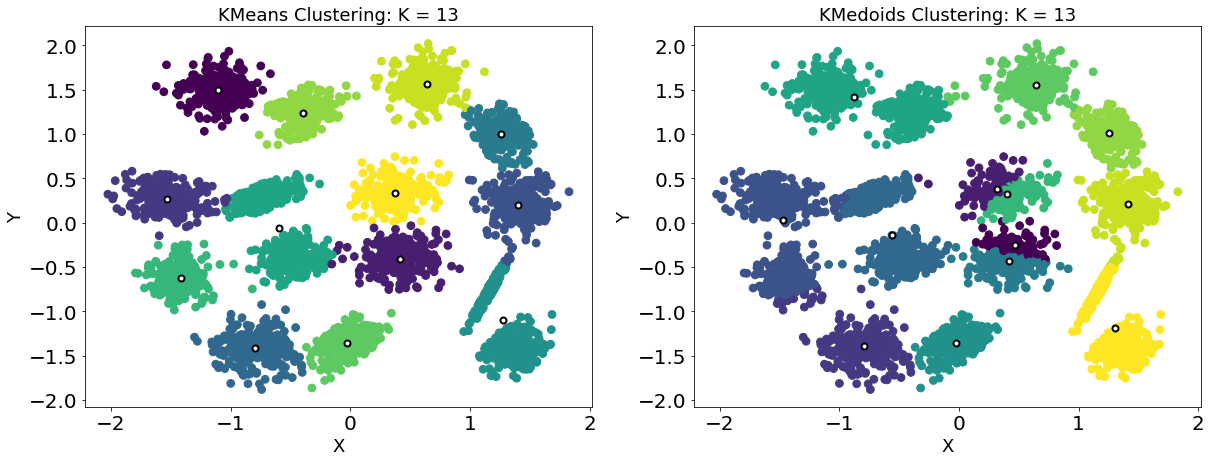

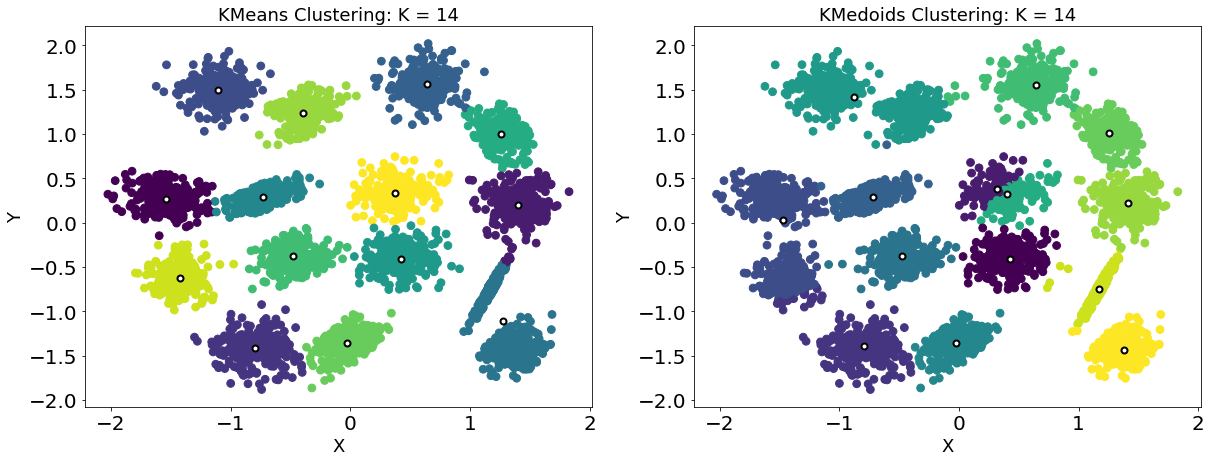

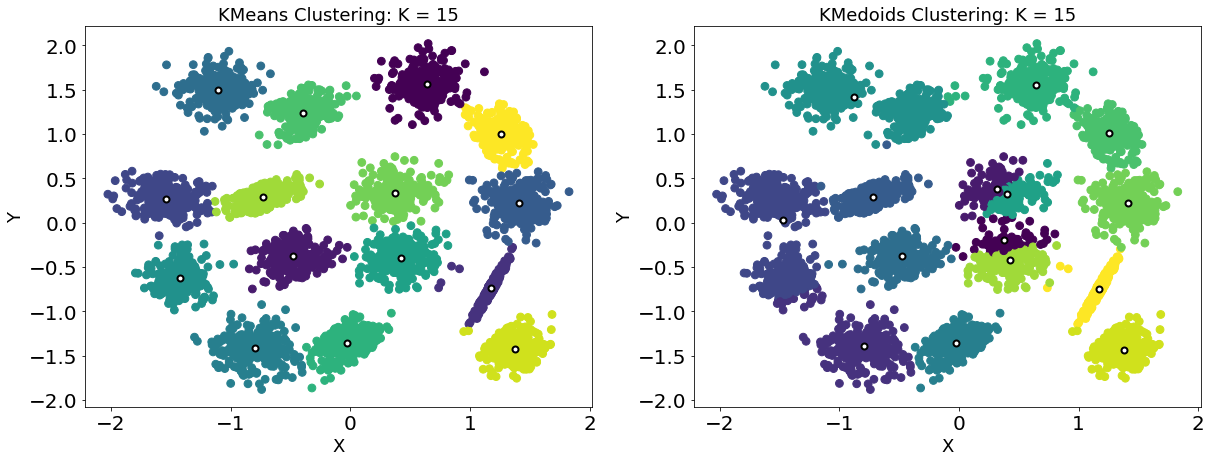

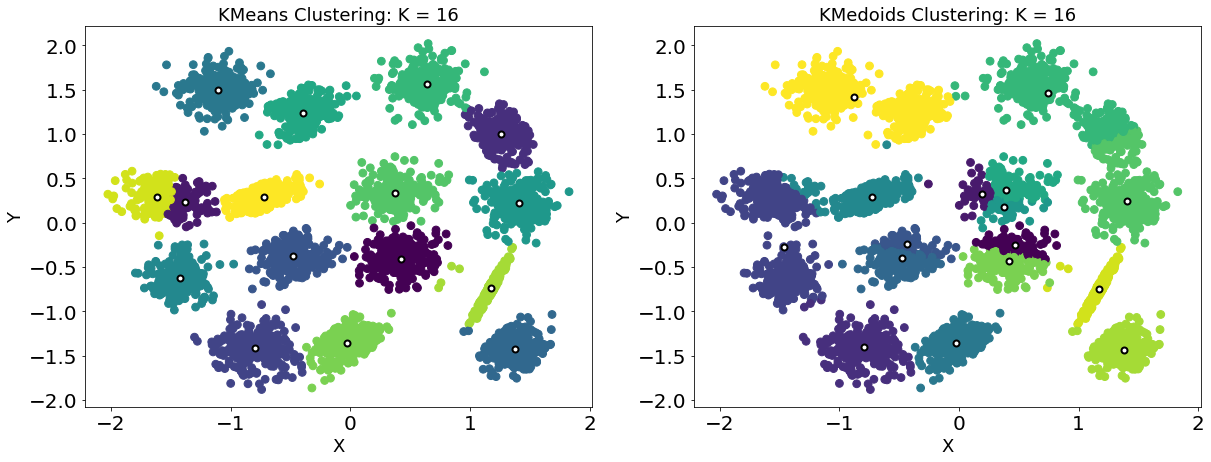

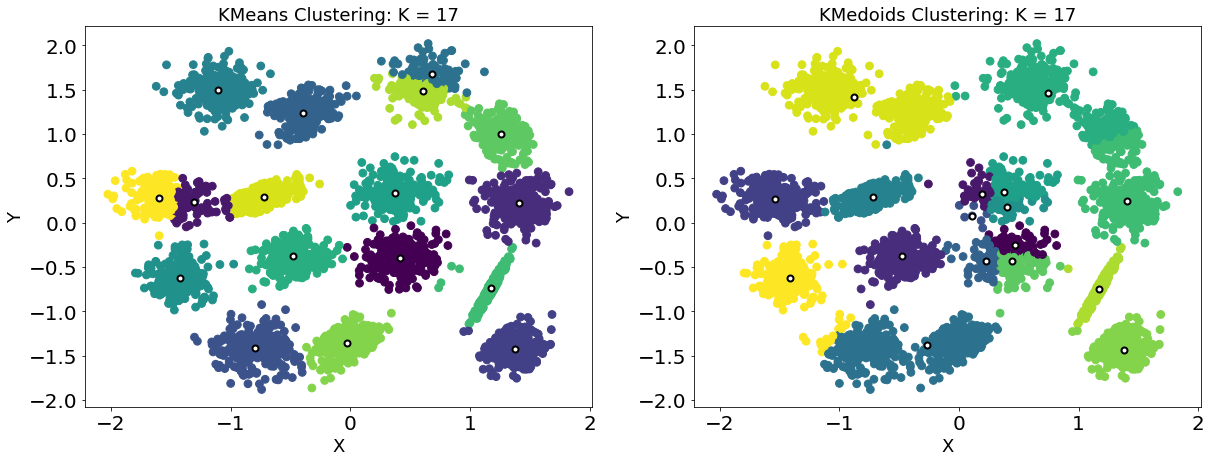

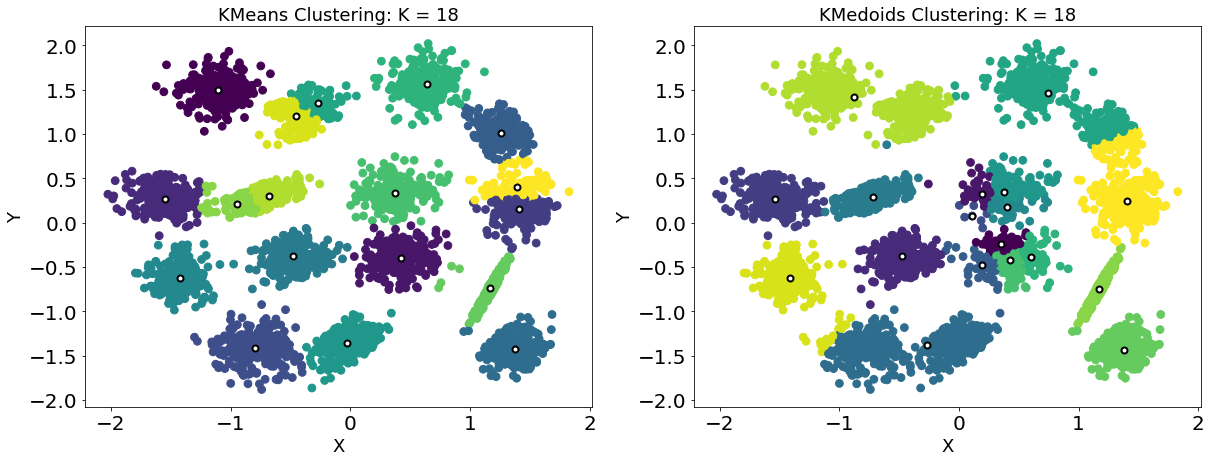

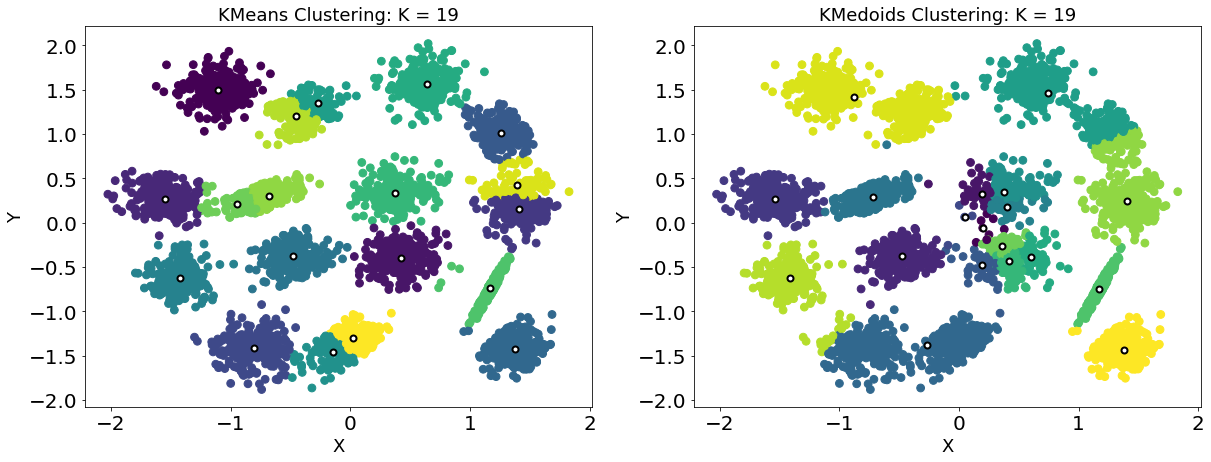

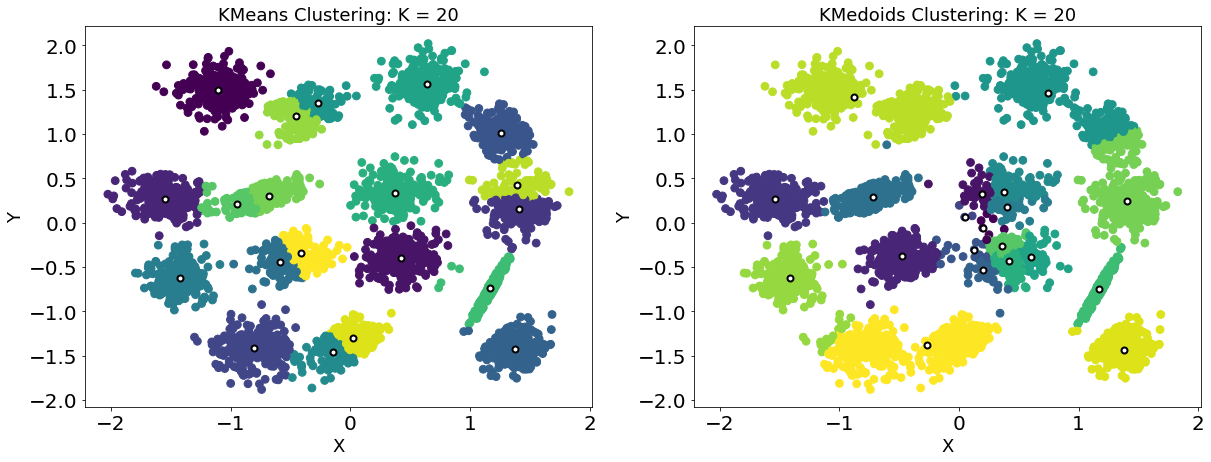

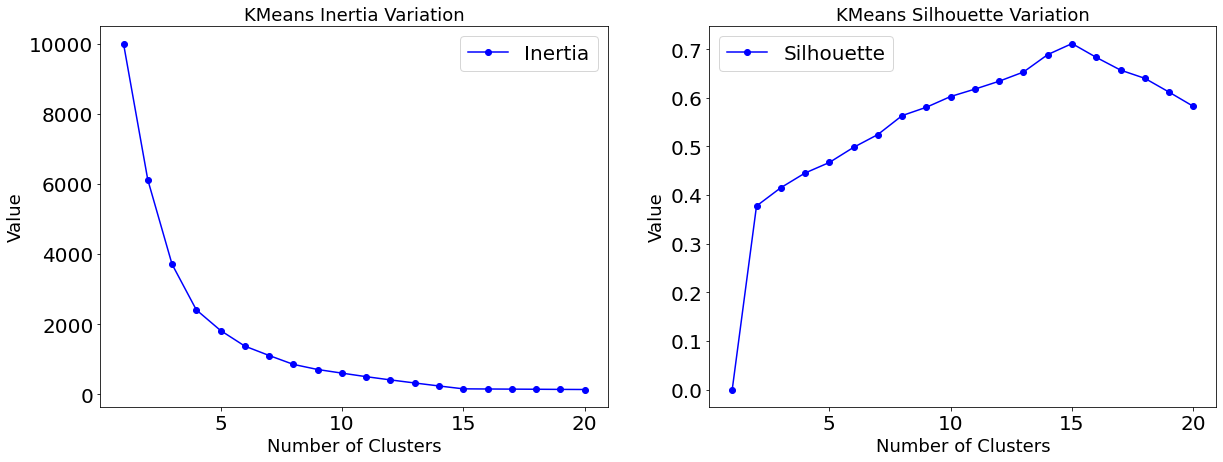

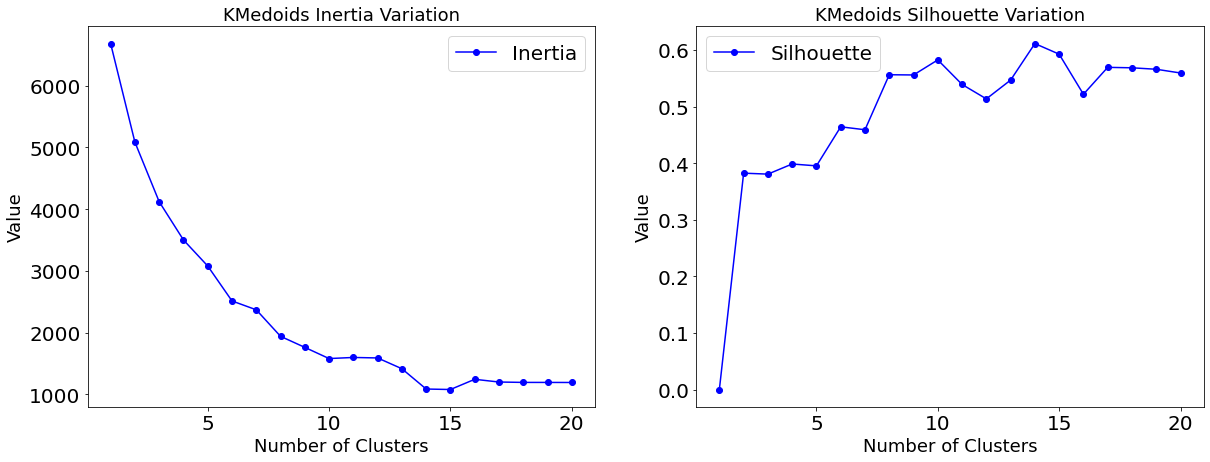

In [28]:
features = ["X", "Y"]
  
num_pipeline = Pipeline([
('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, features),
])

df1_scaled = full_pipeline.fit_transform(df1)

inertia = []
inertia_medoid = []
silhouette = []
silhouette_medoid = []
for k in k_range:
    cls = KMeans(n_clusters = k, random_state = 42)
    cls.fit(df1_scaled)
    centroids = cls.cluster_centers_
    u_labels = np.unique(cls.labels_)
    labels = cls.labels_

    cls_medoid = KMedoids(n_clusters = k, random_state = 42)
    cls_medoid.fit(df1_scaled)
    centroids_medoid = cls_medoid.cluster_centers_
    u_labels_medoid = np.unique(cls_medoid.labels_)
    labels_medoid = cls_medoid.labels_

    fig, axes = plt.subplots(1, 2 , figsize=(20, 7))

    axes[0].scatter(df1_scaled[:, 0], df1_scaled[:, 1], c = labels.astype(float), edgecolor='face', s = 60)
    axes[0].scatter(cls.cluster_centers_[:, 0], cls.cluster_centers_[:, 1], c = 'white', edgecolor = 'black', linewidth = 2)
    axes[0].set_title("KMeans Clustering: K = {}".format(k), fontsize = 18)
    axes[0].set_xlabel("X", fontsize = 18)
    axes[0].set_ylabel("Y", fontsize = 18)
    axes[0].tick_params(axis='both', labelsize=20)

    axes[1].scatter(df1_scaled[:, 0], df1_scaled[:, 1], c = labels_medoid.astype(float), edgecolor='face', s = 60)
    axes[1].scatter(cls_medoid.cluster_centers_[:, 0], cls_medoid.cluster_centers_[:, 1], c = 'white', edgecolor = 'black', linewidth = 2)
    axes[1].set_title("KMedoids Clustering: K = {}".format(k), fontsize = 18)
    axes[1].set_xlabel("X", fontsize = 18)
    axes[1].set_ylabel("Y", fontsize = 18)
    axes[1].tick_params(axis='both', labelsize=20)


    inertia.append(cls.inertia_)
    inertia_medoid.append(cls_medoid.inertia_)
    if k >= 2:
        silhouette.append(silhouette_score(df1_scaled, labels, metric='euclidean'))
        silhouette_medoid.append(silhouette_score(df1_scaled, labels_medoid, metric='euclidean'))
    else:
        silhouette.append(0)
        silhouette_medoid.append(0)


fig, axes = plt.subplots(1, 2 , figsize=(20, 7))
x = k_range
y = inertia
z = silhouette

axes[0].plot(x, y, label = "Inertia", color='blue', marker = 'o')
axes[0].set_title('KMeans Inertia Variation', size = 18)
axes[0].set_xlabel('Number of Clusters', fontsize = 18)
axes[0].set_ylabel('Value', fontsize = 18)
axes[0].legend(fontsize = 20)
axes[0].tick_params(axis='both', labelsize=20)

axes[1].plot(x, z, label = "Silhouette", color='blue', marker = 'o')
axes[1].set_title('KMeans Silhouette Variation', size = 18)
axes[1].set_xlabel('Number of Clusters', fontsize = 18)
axes[1].set_ylabel('Value', fontsize = 18)
axes[1].legend(fontsize = 20)
axes[1].tick_params(axis='both', labelsize=20)

fig, axes = plt.subplots(1, 2 , figsize=(20, 7))
x = k_range
y = inertia_medoid
z = silhouette_medoid

axes[0].plot(x, y, label = "Inertia", color='blue', marker = 'o')
axes[0].set_title('KMedoids Inertia Variation', size = 18)
axes[0].set_xlabel('Number of Clusters', fontsize = 18)
axes[0].set_ylabel('Value', fontsize = 18)
axes[0].legend(fontsize = 20)
axes[0].tick_params(axis='both', labelsize=20)

axes[1].plot(x, z, label = "Silhouette", color='blue', marker = 'o')
axes[1].set_title('KMedoids Silhouette Variation', size = 18)
axes[1].set_xlabel('Number of Clusters', fontsize = 18)
axes[1].set_ylabel('Value', fontsize = 18)
axes[1].legend(fontsize = 20)
axes[1].tick_params(axis='both', labelsize=20)

### Comments:

2. K = 15 is best parameter for both KMeans and KMedoids using combination of Inertia and Silhouette coefficient.
3. We can see centroid is newly calculated for KMeans, whereas, it is an existing point for KMedoids.
4. Silhouette coefficient is around 0.7 for KMeans while around 0.6 for KMedoids indicating KMeans being a better option. Both are forming good clusters but KMeans is slightly better.